## Note

The information in this notebook is also displayed in a tableau public dashboard located at 

https://public.tableau.com/app/profile/nathan.magee4455/viz/SmiteGodStats/Dashboard1

where you can check the distribution of stats per god class at any level you choose. You can also check the stats of any particular gods aswell

# Gods Stats EDA

This notebook is the exploratory analysis for the stats of all of the gods in smite.

I will look at the structure of the data pulled directly from the API clean it up and see if there are any interesting high level views before I work on some ideas.

Im hoping to keep this notebook very standardized to accomidate new gods as they are introduced to the game

A hopeful though I am not expecting to answer any burning questions about the game that is not already known  some useful things may show up.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path
import os

pd.options.mode.chained_assignment = None

## Pulling in the main table data

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
sqliteConnection = sqlite3.connect('{}/API_Interaction/Smite.db'.format(parent))
cursor = sqliteConnection.cursor()

In [3]:
sql_command = """
SELECT * FROM Gods """

df = pd.read_sql_query(sql_command, sqliteConnection)

## Data Cleaning

### First lets check the data

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Ability1,Ability2,Ability3,Ability4,Ability5,AbilityId1,AbilityId2,AbilityId3,AbilityId4,AbilityId5,AttackSpeed,AttackSpeedPerLevel,AutoBanned,Cons,HP5PerLevel,Health,HealthPerFive,HealthPerLevel,Lore,MP5PerLevel,MagicProtection,MagicProtectionPerLevel,MagicalPower,MagicalPowerPerLevel,Mana,ManaPerFive,ManaPerLevel,Name,OnFreeRotation,Pantheon,PhysicalPower,PhysicalPowerPerLevel,PhysicalProtection,PhysicalProtectionPerLevel,Pros,Roles,Speed,Title,Type,godAbility1_URL,godAbility2_URL,godAbility3_URL,godAbility4_URL,godAbility5_URL,godCard_URL,godIcon_URL,id,latestGod,ret_msg
0,Shield of Achilles,Radiant Glory,Combat Dodge,Fatal Strike,Gift of the Gods,15676,15677,15679,15680,15678,0.95,0.012,n,,0.75,665,9,89,King Agamemnon brought his fury to bear agains...,0.39,38.4,1.2,0,0.0,205,4.7,35,Achilles,,Greek,38,2.0,23.8,3.2,"High Single Target Damage, High Mobility",Warrior,370,Hero of the Trojan War,"Melee, Physical",https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-card...,https://webcdn.hirezstudios.com/smite/god-icon...,3492,n,None
1,Noxious Fumes,Flame Wave,Path of Flames,Rain Fire,Combustion,7812,7811,7818,7824,7822,1.00,0.012,n,,0.47,504,7,75,There are few elements as destructive or as pu...,0.37,38.4,1.2,170,7.5,255,4.7,45,Agni,,Hindu,0,0.0,15.4,2.8,High Area Damage,Mage,355,God of Fire,"Ranged, Magical",https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-card...,https://webcdn.hirezstudios.com/smite/god-icon...,1737,n,None
2,Hive,Swarm,Honey,Stinger,Bees!,9385,9381,9423,9393,9380,0.95,0.016,n,,0.71,630,7,77,It is said that history is written by the vict...,0.38,38.4,1.2,0,0.0,230,4.4,40,Ah Muzen Cab,,Maya,38,2.2,16.8,3.2,"High Movement Speed, High Attack Speed",Hunter,365,God of Bees,"Ranged, Physical",https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-card...,https://webcdn.hirezstudios.com/smite/god-icon...,1956,n,None
3,Undead Surge,Corpse Explosion,Fleeting Breath,Empty the Crypts,Hollow Ground,11348,16364,11394,11364,11361,0.86,0.008,n,,0.45,630,6,79,Buried beneath the crust of the world descends...,0.42,38.4,1.2,175,7.5,265,4.9,55,Ah Puch,,Maya,0,0.0,18.2,2.9,High Area Damage,Mage,365,Horrific God of Decay,"Ranged, Magical",https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-card...,https://webcdn.hirezstudios.com/smite/god-icon...,2056,n,None
4,Divine Presence,Heavenly Reflection,Glorious Charge,Dazzling Offensive,Illuminating Strike,12046,12055,12047,12049,12072,1.00,0.014,n,,0.80,672,8,89,"As the first rays of dawn cross the horizon, b...",0.40,38.4,1.2,0,0.0,220,4.8,35,Amaterasu,,Japanese,39,2.0,25.2,3.2,"High Area Damage, High Mobility",Warrior,375,The Shining Light,"Melee, Physical",https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-card...,https://webcdn.hirezstudios.com/smite/god-icon...,2110,n,None


In [5]:
print(df.shape)

(121, 49)


In [6]:
df.describe()

,AbilityId1,AbilityId2,AbilityId3,AbilityId4,AbilityId5,AttackSpeed,AttackSpeedPerLevel,HP5PerLevel,Health,HealthPerFive,HealthPerLevel,MP5PerLevel,MagicProtection,MagicProtectionPerLevel,MagicalPower,MagicalPowerPerLevel,Mana,ManaPerFive,ManaPerLevel,PhysicalPower,PhysicalPowerPerLevel,PhysicalProtection,PhysicalProtectionPerLevel,Speed,id
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,1.210000e+02,1.210000e+02,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,12631.322314,12717.082645,12824.380165,12633.462810,12728.570248,0.964215,0.013050,0.650165,624.619835,7.595041,84.438017,0.384711,3.840000e+01,1.200000e+00,82.809917,3.665289,228.107438,4.491736,39.900826,20.057851,1.208926,19.680992,3.135537,367.033058,2421.057851
std,4166.627648,4157.678640,4193.271053,4162.500675,4100.813630,0.050312,0.004477,0.130722,61.296718,1.215034,8.711958,0.077342,7.134972e-15,2.229679e-16,88.444645,3.965811,38.852242,0.694932,8.526825,19.048752,1.157270,5.285804,0.208910,6.554812,822.753277
min,7305.000000,7324.000000,7307.000000,7308.000000,7547.000000,0.850000,0.000000,0.430000,504.000000,5.000000,70.000000,0.000000,3.840000e+01,1.200000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.200000,2.700000,355.000000,1649.000000
25%,9004.000000,9013.000000,9228.000000,9096.000000,9188.000000,0.950000,0.010000,0.500000,560.000000,7.000000,79.000000,0.370000,3.840000e+01,1.200000e+00,0.000000,0.000000,205.000000,4.400000,35.000000,0.000000,0.000000,15.400000,3.000000,360.000000,1872.000000
50%,11596.000000,11731.000000,11738.000000,11492.000000,11831.000000,1.000000,0.012000,0.690000,637.000000,8.000000,82.000000,0.400000,3.840000e+01,1.200000e+00,0.000000,0.000000,225.000000,4.600000,38.000000,35.000000,2.000000,18.200000,3.200000,365.000000,2037.000000
75%,15877.000000,16279.000000,16203.000000,15909.000000,15869.000000,1.000000,0.016000,0.720000,679.000000,8.000000,89.000000,0.430000,3.840000e+01,1.200000e+00,175.000000,7.500000,245.000000,4.800000,41.000000,38.000000,2.250000,25.200000,3.200000,375.000000,3344.000000
max,21904.000000,21905.000000,21906.000000,21907.000000,21912.000000,1.050000,0.024000,0.900000,714.000000,10.000000,109.000000,0.600000,3.840000e+01,1.200000e+00,200.000000,12.000000,350.000000,5.500000,58.000000,41.000000,3.000000,32.200000,3.800000,381.000000,4075.000000


In [7]:
df.describe(exclude=[np.number])

,Ability1,Ability2,Ability3,Ability4,Ability5,AutoBanned,Cons,Lore,Name,OnFreeRotation,Pantheon,Pros,Roles,Title,Type,godAbility1_URL,godAbility2_URL,godAbility3_URL,godAbility4_URL,godAbility5_URL,godCard_URL,godIcon_URL,latestGod,ret_msg
count,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,0
unique,121,121,120,121,121,2,1,121,121,2,16,39,5,121,5,121,121,120,121,121,121,121,2,0
top,Shield of Achilles,Radiant Glory,72 Transformations,Fatal Strike,Gift of the Gods,n,,King Agamemnon brought his fury to bear agains...,Achilles,,Greek,High Area Damage,Mage,Hero of the Trojan War,"Melee, Physical",https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-abil...,https://webcdn.hirezstudios.com/smite/god-card...,https://webcdn.hirezstudios.com/smite/god-icon...,n,NaN
freq,1,1,2,1,1,120,121,1,1,116,22,19,36,1,43,1,1,2,1,1,1,1,120,NaN


### Now lets remove un-needed columns and reformat others to better suit our needs

#### Removing the columns that dont really tell us anything (abilty name lore ect.)

In [8]:
df_main = df[['AttackSpeed', 'AttackSpeedPerLevel', 'Cons', 'HP5PerLevel', 'Health', 'HealthPerFive', 'HealthPerLevel', 'MP5PerLevel', 'MagicProtection', 'MagicProtectionPerLevel', 'MagicalPower', 'MagicalPowerPerLevel', 'Mana', 'ManaPerFive', 'ManaPerLevel', 'Name', 'PhysicalPower', 'PhysicalPowerPerLevel', 'PhysicalProtection', 'PhysicalProtectionPerLevel', 'Pros', 'Roles', 'Speed', 'Type']]
df_main.head()

,AttackSpeed,AttackSpeedPerLevel,Cons,HP5PerLevel,Health,HealthPerFive,HealthPerLevel,MP5PerLevel,MagicProtection,MagicProtectionPerLevel,MagicalPower,MagicalPowerPerLevel,Mana,ManaPerFive,ManaPerLevel,Name,PhysicalPower,PhysicalPowerPerLevel,PhysicalProtection,PhysicalProtectionPerLevel,Pros,Roles,Speed,Type
0,0.95,0.012,,0.75,665,9,89,0.39,38.4,1.2,0,0.0,205,4.7,35,Achilles,38,2.0,23.8,3.2,"High Single Target Damage, High Mobility",Warrior,370,"Melee, Physical"
1,1.00,0.012,,0.47,504,7,75,0.37,38.4,1.2,170,7.5,255,4.7,45,Agni,0,0.0,15.4,2.8,High Area Damage,Mage,355,"Ranged, Magical"
2,0.95,0.016,,0.71,630,7,77,0.38,38.4,1.2,0,0.0,230,4.4,40,Ah Muzen Cab,38,2.2,16.8,3.2,"High Movement Speed, High Attack Speed",Hunter,365,"Ranged, Physical"
3,0.86,0.008,,0.45,630,6,79,0.42,38.4,1.2,175,7.5,265,4.9,55,Ah Puch,0,0.0,18.2,2.9,High Area Damage,Mage,365,"Ranged, Magical"
4,1.00,0.014,,0.80,672,8,89,0.40,38.4,1.2,0,0.0,220,4.8,35,Amaterasu,39,2.0,25.2,3.2,"High Area Damage, High Mobility",Warrior,375,"Melee, Physical"


#### Taking some of the info out of columns and seprating them into differnt points

In [9]:
df_main[['Range','Damage_Type']] = df.Type.str.split(expand=True)

## wrouadabout way of getting past there being different amounts of pros per god
df_temp = df_main.Pros.str.split(',', expand=True)
df_temp.columns = ['Pro{}'.format(x+1) for x in df_temp.columns]
df_temp
df_main = df_main.join(df_temp)

In [10]:
df_main.head()

,AttackSpeed,AttackSpeedPerLevel,Cons,HP5PerLevel,Health,HealthPerFive,HealthPerLevel,MP5PerLevel,MagicProtection,MagicProtectionPerLevel,MagicalPower,MagicalPowerPerLevel,Mana,ManaPerFive,ManaPerLevel,Name,PhysicalPower,PhysicalPowerPerLevel,PhysicalProtection,PhysicalProtectionPerLevel,Pros,Roles,Speed,Type,Range,Damage_Type,Pro1,Pro2,Pro3
0,0.95,0.012,,0.75,665,9,89,0.39,38.4,1.2,0,0.0,205,4.7,35,Achilles,38,2.0,23.8,3.2,"High Single Target Damage, High Mobility",Warrior,370,"Melee, Physical","Melee,",Physical,High Single Target Damage,High Mobility,None
1,1.00,0.012,,0.47,504,7,75,0.37,38.4,1.2,170,7.5,255,4.7,45,Agni,0,0.0,15.4,2.8,High Area Damage,Mage,355,"Ranged, Magical","Ranged,",Magical,High Area Damage,None,None
2,0.95,0.016,,0.71,630,7,77,0.38,38.4,1.2,0,0.0,230,4.4,40,Ah Muzen Cab,38,2.2,16.8,3.2,"High Movement Speed, High Attack Speed",Hunter,365,"Ranged, Physical","Ranged,",Physical,High Movement Speed,High Attack Speed,None
3,0.86,0.008,,0.45,630,6,79,0.42,38.4,1.2,175,7.5,265,4.9,55,Ah Puch,0,0.0,18.2,2.9,High Area Damage,Mage,365,"Ranged, Magical","Ranged,",Magical,High Area Damage,None,None
4,1.00,0.014,,0.80,672,8,89,0.40,38.4,1.2,0,0.0,220,4.8,35,Amaterasu,39,2.0,25.2,3.2,"High Area Damage, High Mobility",Warrior,375,"Melee, Physical","Melee,",Physical,High Area Damage,High Mobility,None


#### Some columns should be brought together id magical and physical power

In [11]:
## call it this as thats what the stat represents in game
## magical side is divided by 5 as in game the final number is 20% of the damage
df_main['AutoAttackDamage'] = df_main.PhysicalPower + df_main.MagicalPower/5
df_main['AutoAttackDamagePerLevel'] = df_main.PhysicalPowerPerLevel + df_main.MagicalPowerPerLevel/5
df_main

,AttackSpeed,AttackSpeedPerLevel,Cons,HP5PerLevel,Health,HealthPerFive,HealthPerLevel,MP5PerLevel,MagicProtection,MagicProtectionPerLevel,MagicalPower,MagicalPowerPerLevel,Mana,ManaPerFive,ManaPerLevel,Name,PhysicalPower,PhysicalPowerPerLevel,PhysicalProtection,PhysicalProtectionPerLevel,Pros,Roles,Speed,Type,Range,Damage_Type,Pro1,Pro2,Pro3,AutoAttackDamage,AutoAttackDamagePerLevel
0,0.95,0.012,,0.75,665,9,89,0.39,38.4,1.2,0,0.00,205,4.7,35,Achilles,38,2.0,23.8,3.2,"High Single Target Damage, High Mobility",Warrior,370,"Melee, Physical","Melee,",Physical,High Single Target Damage,High Mobility,None,38.0,2.00
1,1.00,0.012,,0.47,504,7,75,0.37,38.4,1.2,170,7.50,255,4.7,45,Agni,0,0.0,15.4,2.8,High Area Damage,Mage,355,"Ranged, Magical","Ranged,",Magical,High Area Damage,None,None,34.0,1.50
2,0.95,0.016,,0.71,630,7,77,0.38,38.4,1.2,0,0.00,230,4.4,40,Ah Muzen Cab,38,2.2,16.8,3.2,"High Movement Speed, High Attack Speed",Hunter,365,"Ranged, Physical","Ranged,",Physical,High Movement Speed,High Attack Speed,None,38.0,2.20
3,0.86,0.008,,0.45,630,6,79,0.42,38.4,1.2,175,7.50,265,4.9,55,Ah Puch,0,0.0,18.2,2.9,High Area Damage,Mage,365,"Ranged, Magical","Ranged,",Magical,High Area Damage,None,None,35.0,1.50
4,1.00,0.014,,0.80,672,8,89,0.40,38.4,1.2,0,0.00,220,4.8,35,Amaterasu,39,2.0,25.2,3.2,"High Area Damage, High Mobility",Warrior,375,"Melee, Physical","Melee,",Physical,High Area Damage,High Mobility,None,39.0,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.00,0.012,,0.70,686,6,100,0.00,38.4,1.2,170,7.50,0,0.0,0,Yemoja,0,0.0,26.6,3.2,High Sustain,Guardian,365,"Ranged, Magical","Ranged,",Magical,High Sustain,None,None,34.0,1.50
117,0.85,0.010,,0.90,714,8,109,0.40,38.4,1.2,190,7.75,200,4.5,32,Ymir,0,0.0,32.2,3.6,"High Crowd Control, High Defense",Guardian,370,"Melee, Magical","Melee,",Magical,High Crowd Control,High Defense,None,38.0,1.55
118,1.00,0.012,,0.47,560,7,81,0.44,38.4,1.2,175,7.50,280,4.7,55,Yu Huang,0,0.0,16.8,3.2,High Area Damage,Mage,355,"Ranged, Magical","Ranged,",Magical,High Area Damage,None,None,35.0,1.50
119,0.95,0.009,,0.45,532,6,75,0.45,38.4,1.2,175,7.50,245,4.6,44,Zeus,0,0.0,11.2,2.9,High Area Damage,Mage,360,"Ranged, Magical","Ranged,",Magical,High Area Damage,None,None,35.0,1.50


#### Lets re-order the columns into a much nicer arrangement

In [12]:
df_ordered = df_main[['Name', 'Damage_Type', 'Roles', 'Range', 'Pro1', 'Pro2', 'Pro3', 'Health', 'HealthPerLevel', 'HealthPerFive', 'HP5PerLevel', 'Mana', 'ManaPerLevel', 'ManaPerFive', 'MP5PerLevel', 'PhysicalProtection', 'PhysicalProtectionPerLevel', 'MagicProtection', 'MagicProtectionPerLevel', 'AttackSpeed', 'AttackSpeedPerLevel', 'AutoAttackDamage', 'AutoAttackDamagePerLevel', 'Speed']]
# also use this as a time to drop some columns

In [13]:
df_ordered.head()

,Name,Damage_Type,Roles,Range,Pro1,Pro2,Pro3,Health,HealthPerLevel,HealthPerFive,HP5PerLevel,Mana,ManaPerLevel,ManaPerFive,MP5PerLevel,PhysicalProtection,PhysicalProtectionPerLevel,MagicProtection,MagicProtectionPerLevel,AttackSpeed,AttackSpeedPerLevel,AutoAttackDamage,AutoAttackDamagePerLevel,Speed
0,Achilles,Physical,Warrior,"Melee,",High Single Target Damage,High Mobility,None,665,89,9,0.75,205,35,4.7,0.39,23.8,3.2,38.4,1.2,0.95,0.012,38.0,2.0,370
1,Agni,Magical,Mage,"Ranged,",High Area Damage,None,None,504,75,7,0.47,255,45,4.7,0.37,15.4,2.8,38.4,1.2,1.00,0.012,34.0,1.5,355
2,Ah Muzen Cab,Physical,Hunter,"Ranged,",High Movement Speed,High Attack Speed,None,630,77,7,0.71,230,40,4.4,0.38,16.8,3.2,38.4,1.2,0.95,0.016,38.0,2.2,365
3,Ah Puch,Magical,Mage,"Ranged,",High Area Damage,None,None,630,79,6,0.45,265,55,4.9,0.42,18.2,2.9,38.4,1.2,0.86,0.008,35.0,1.5,365
4,Amaterasu,Physical,Warrior,"Melee,",High Area Damage,High Mobility,None,672,89,8,0.80,220,35,4.8,0.40,25.2,3.2,38.4,1.2,1.00,0.014,39.0,2.0,375


#### Now are dataset is nice and clean we will use this going forward

In [14]:
dataset = df_ordered

In [15]:
dataset.to_csv('Excels/God_data.csv')

## Some EDA

### lets see how some of the stats are distributed

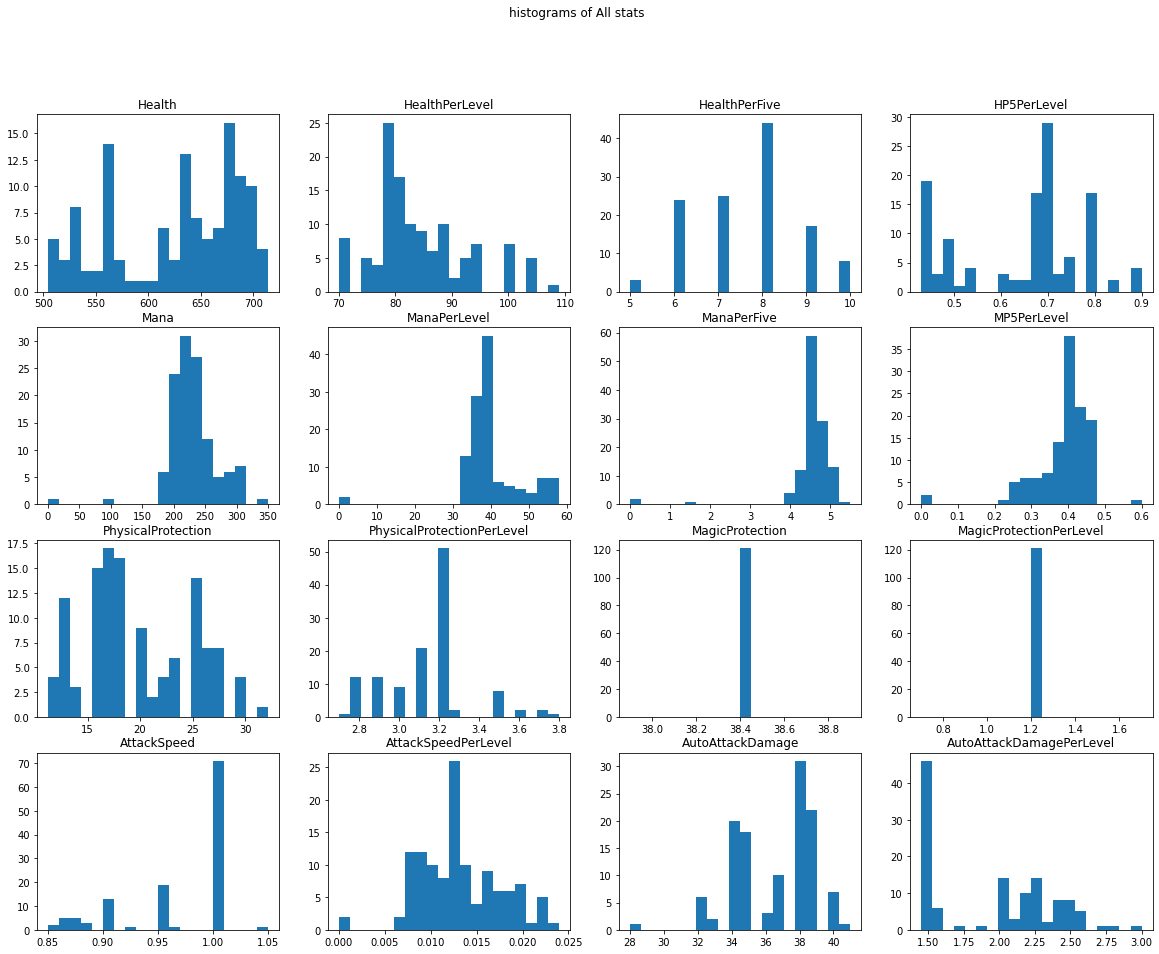

In [16]:
fig, ax = plt.subplots(4, 4, figsize=(20,15)) 

fig.suptitle('histograms of All stats')

for i in range(0, 4):
    for j in range(0, 4):
        k = i*4 + j + 7
        ax[i, j].set_title(dataset.columns[k])
        ax[i, j].hist(dataset.iloc[:, k].values, 20)

Text(0.5, 1.0, 'Speed')

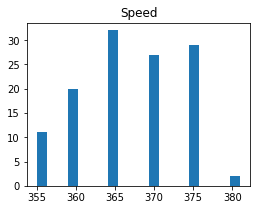

In [17]:
## one more to show speed stat
fig1, ax1 = plt.subplots(1, 1, figsize=(4,3))

ax1.hist(dataset.iloc[:, 23].values, 20)
ax1.set_title(dataset.columns[23])

For furture plots seeing as magicl prot and prot per level are the same regardless of who you are we can ignore them. Will probably just ignore one so I can keep the full overlook of each stat in the one grid.

### Lets now look at it over some of the catagorical lenses like Role and Damage Type

In [18]:
stats = ['Health', 'HealthPerLevel', 'HealthPerFive', 'HP5PerLevel', 'Mana', 'ManaPerLevel', 'ManaPerFive', 'MP5PerLevel', 'PhysicalProtection', 'PhysicalProtectionPerLevel', 'AttackSpeed', 'AttackSpeedPerLevel', 'AutoAttackDamage', 'AutoAttackDamagePerLevel', 'Speed']

In [19]:
def Plot_stat_Role(k):
    fig, ax = plt.subplots(1, 5, figsize=(25,5)) 

    min_ = dataset[k].min()
    max_ = dataset[k].max()

    A = dataset[k][dataset.Roles=='Warrior'].values
    B = dataset[k][dataset.Roles=='Assassin'].values
    C = dataset[k][dataset.Roles=='Mage'].values
    D = dataset[k][dataset.Roles=='Guardian'].values
    E = dataset[k][dataset.Roles=='Hunter'].values
    data = [A, B, C, D, E]
    labels = ['Warrior', 'Assasin', 'Mage', 'Guardian' , 'Hunter']
    color = ['Red', 'Yellow', 'Blue', 'Green', 'Orange']

    for i, x in enumerate(data):
        ax[i].set_xlim(min_, max_)
        ax[i].set_title(labels[i])
        ax[i].hist(x, len(x), color = color[i])
        
    plt.show()

Health


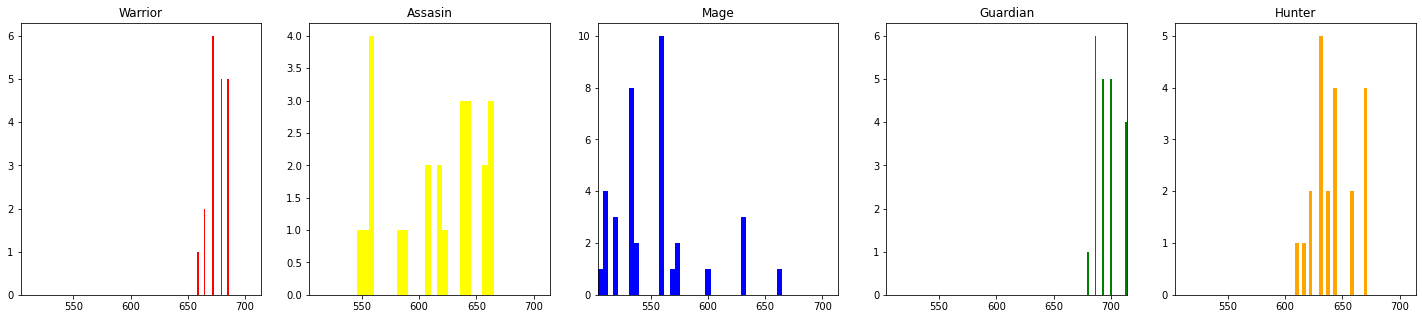

HealthPerLevel


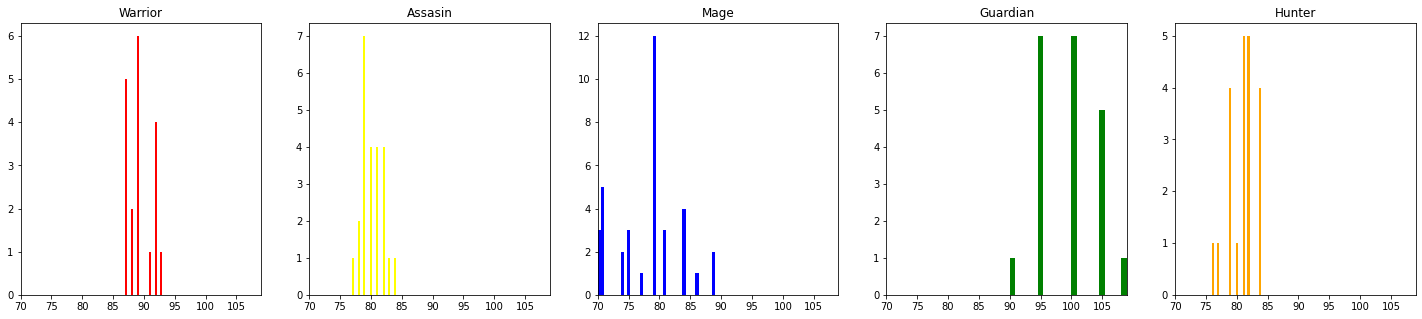

HealthPerFive


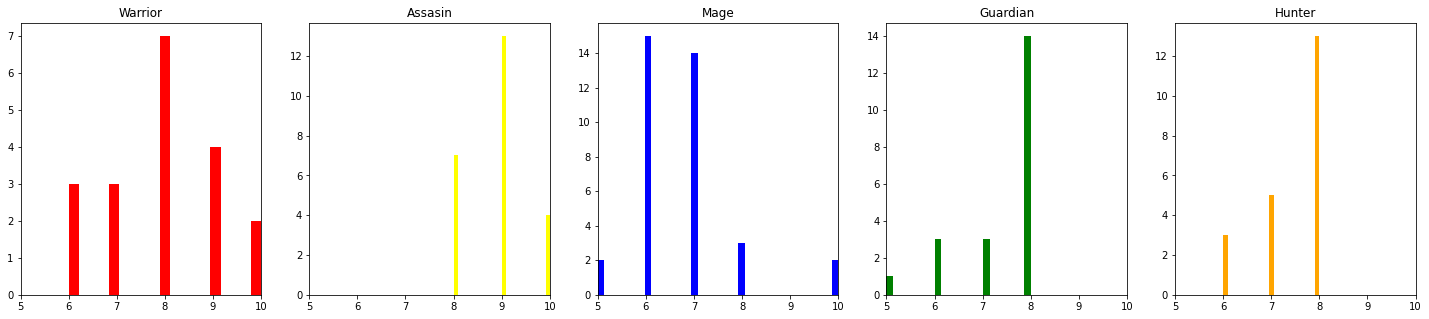

HP5PerLevel


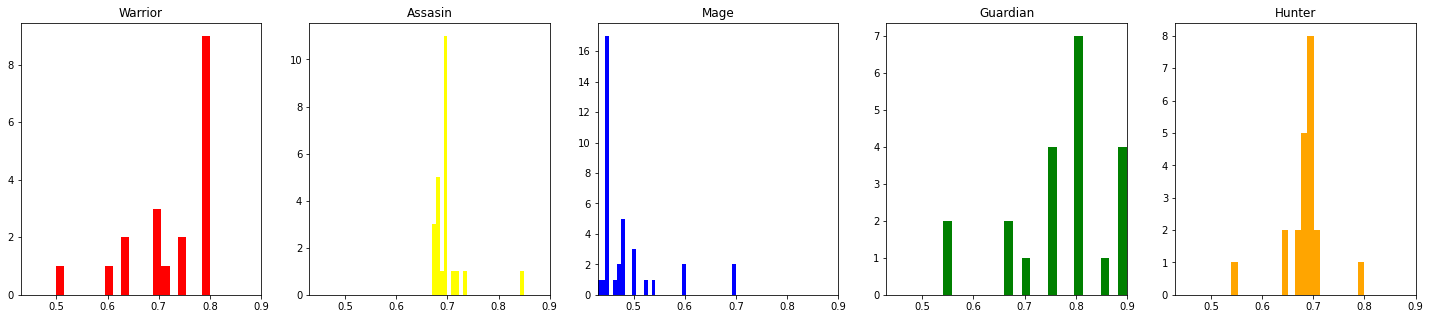

Mana


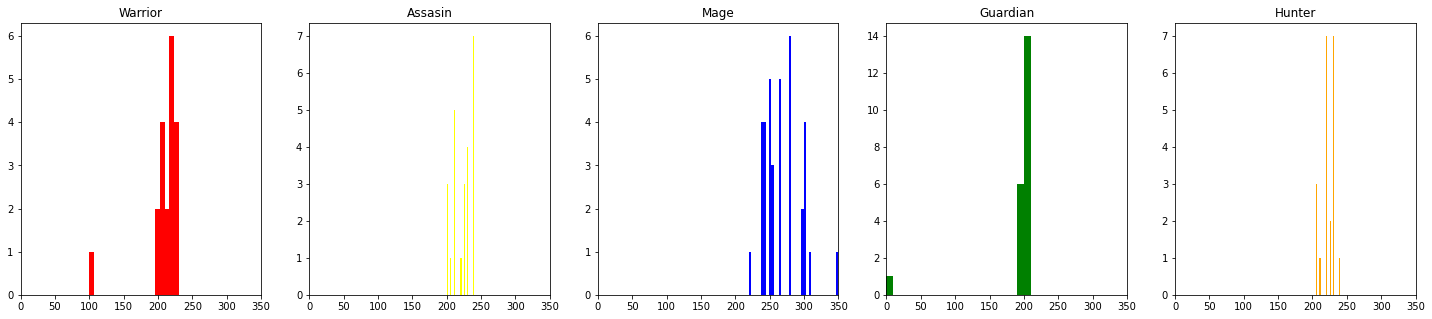

ManaPerLevel


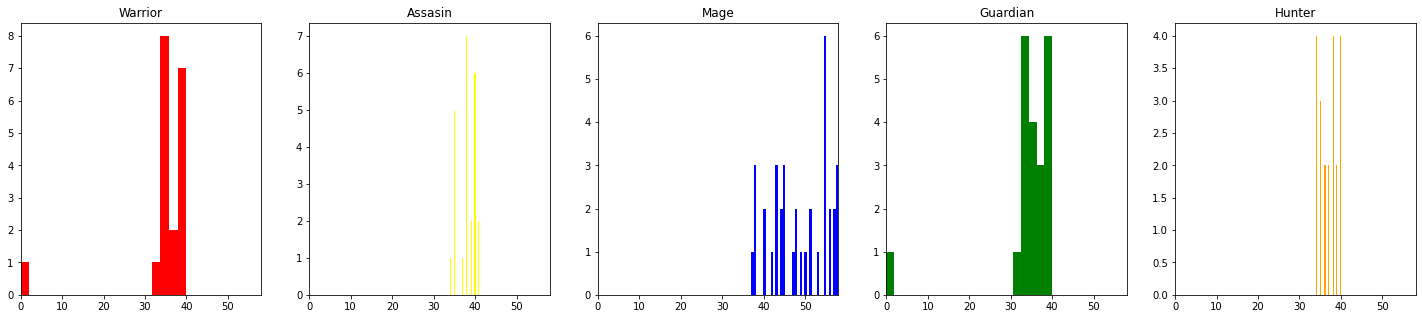

ManaPerFive


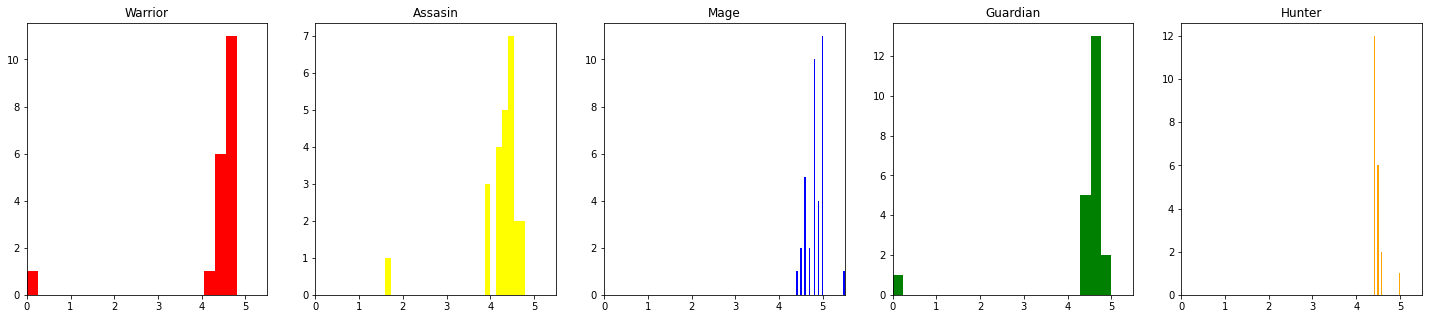

MP5PerLevel


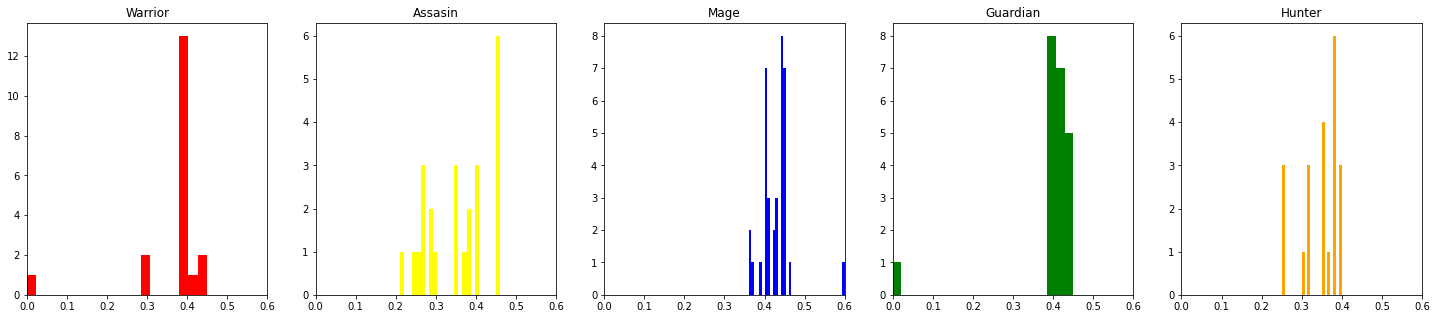

PhysicalProtection


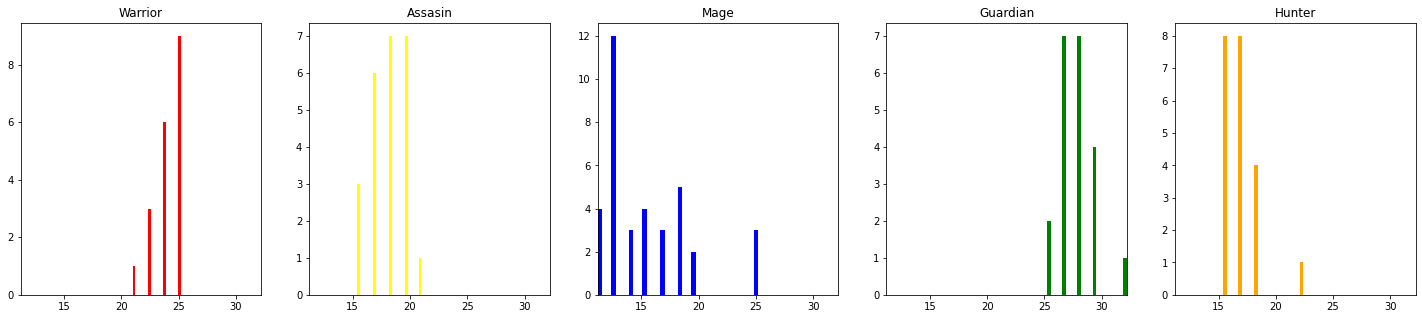

PhysicalProtectionPerLevel


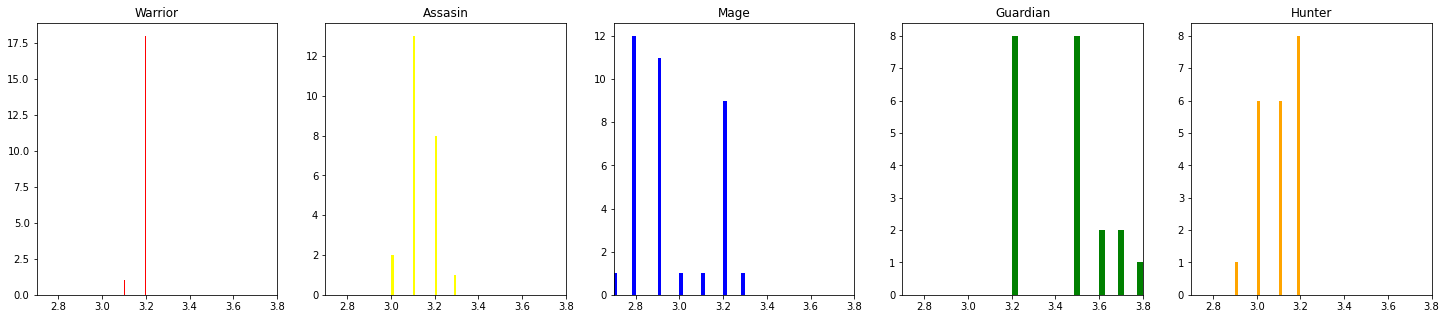

AttackSpeed


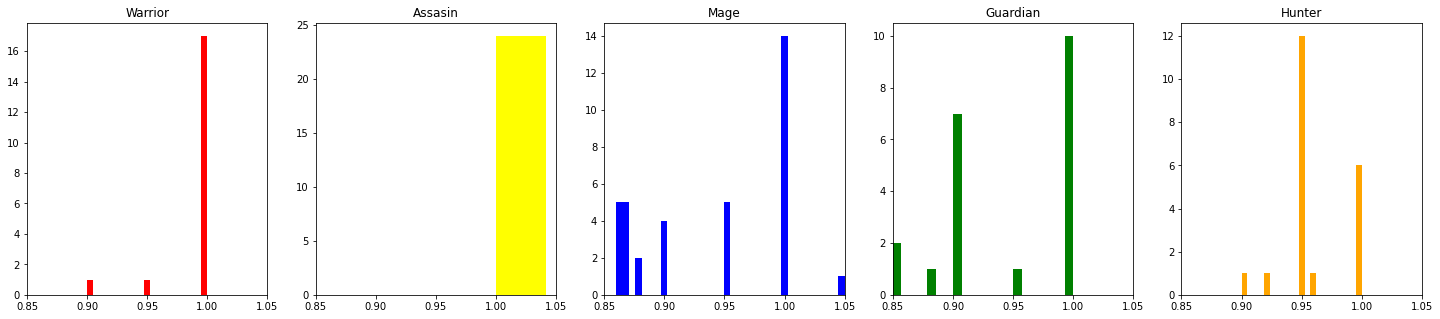

AttackSpeedPerLevel


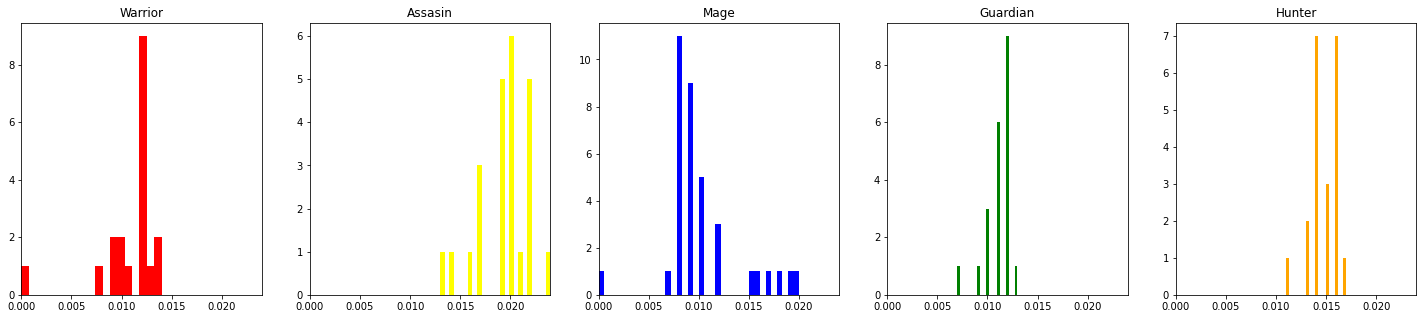

AutoAttackDamage


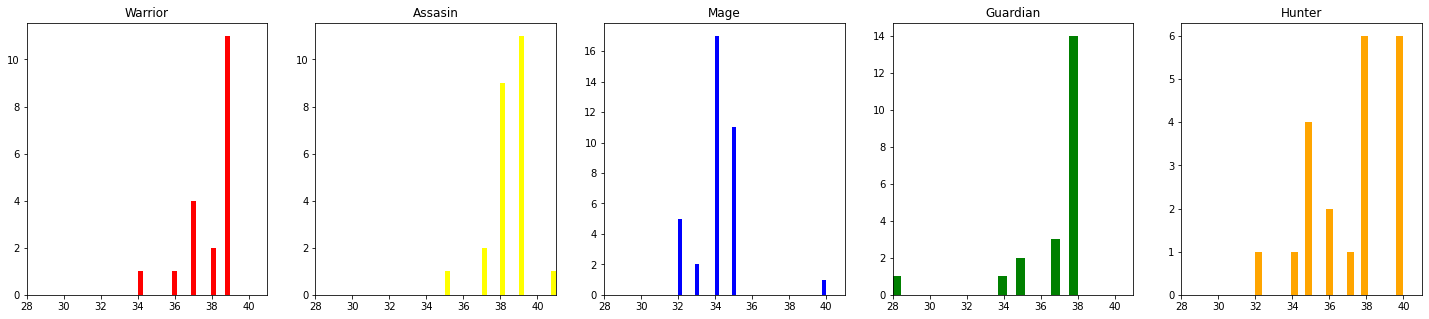

AutoAttackDamagePerLevel


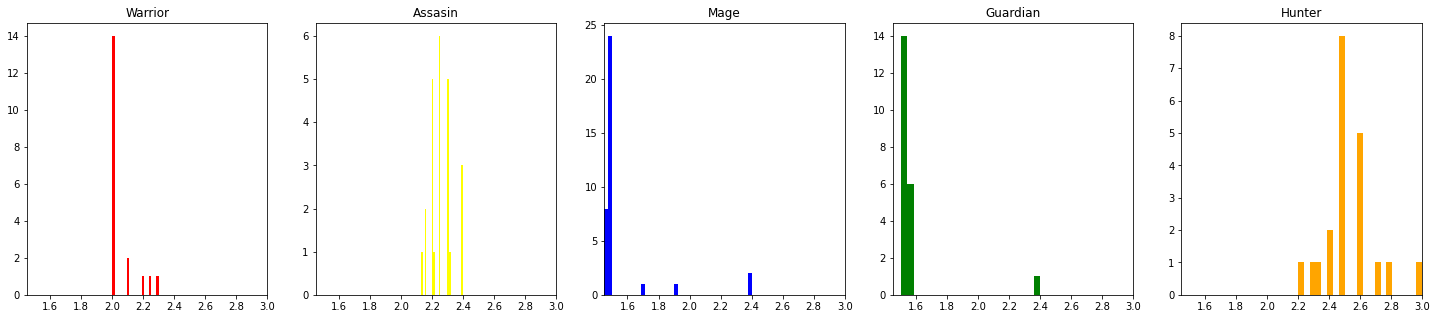

Speed


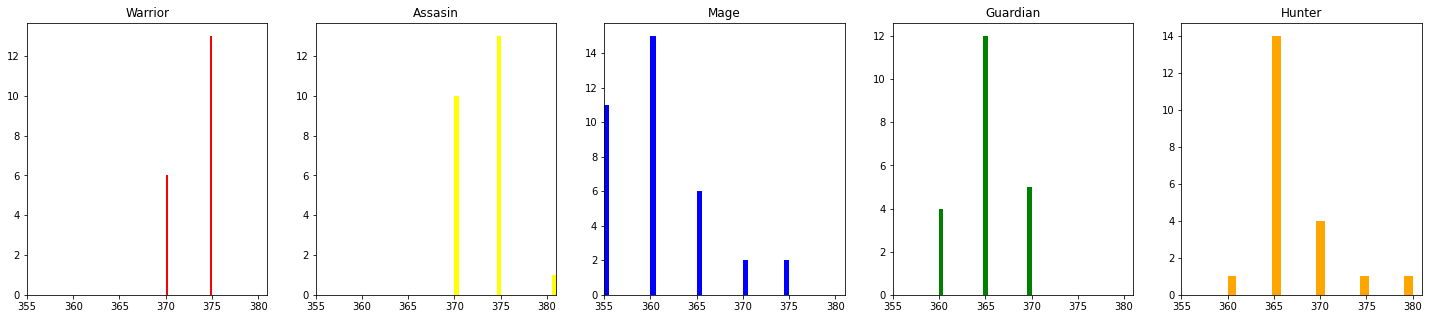

In [21]:
for stat in stats:
    print(stat)
    Plot_stat_Role(stat)

##### Role or "Class" as it is in game is one of the more intersting ones

we can see some clear divides in what some calsses do over others, for example look at the auto attack damage per level

![alt text](images/AAPL.jpeg "")

Here we can clearly see that hunters are by far the best class for increasing there auto attack damage as the game progresses and on the otherhand mages are the worst. This makes sense when you realise that the games classes are designed around architypes and hunters archetype is "Do a lot of consistent (Auto Attack) Damage Late Game (when the game is nearing the end)"

Its also worth noting that there are some outliers in each class for example for the mage class there are a few mages that have seemingly higher Physical Protections than the others, namely Nox, Hades and baron. This is because these characters are designed to be more tanky versions of the general mage class, but they lack the general other traits of a guardian.

##### Lets see if there are any more patterns from the other traits

In [22]:
dataset[dataset.Roles == 'Mage'].sort_values(by = 'AutoAttackDamagePerLevel')

,Name,Damage_Type,Roles,Range,Pro1,Pro2,Pro3,Health,HealthPerLevel,HealthPerFive,HP5PerLevel,Mana,ManaPerLevel,ManaPerFive,MP5PerLevel,PhysicalProtection,PhysicalProtectionPerLevel,MagicProtection,MagicProtectionPerLevel,AttackSpeed,AttackSpeedPerLevel,AutoAttackDamage,AutoAttackDamagePerLevel,Speed
66,Kukulkan,Magical,Mage,"Ranged,",High Area Damage,Pusher,None,532,79,7,0.46,265,45,5.0,0.45,18.2,3.2,38.4,1.2,0.87,0.008,34.0,1.45,360
54,Hera,Magical,Mage,"Ranged,",High Area Damage,High Crowd Control,None,532,71,6,0.45,265,45,4.8,0.41,12.6,2.9,38.4,1.2,0.90,0.009,34.0,1.45,365
51,He Bo,Magical,Mage,"Ranged,",High Area Damage,Medium Crowd Control,None,560,70,6,0.45,298,56,4.9,0.40,12.6,2.8,38.4,1.2,0.86,0.008,34.0,1.45,355
60,Janus,Magical,Mage,"Ranged,",High Area Damage,High Mobility,None,560,74,6,0.45,350,58,5.0,0.45,11.2,2.8,38.4,1.2,1.00,0.008,34.0,1.45,360
28,Chang'e,Magical,Mage,"Ranged,",High Sustain,High Mobility,None,574,84,6,0.45,310,48,5.5,0.44,15.4,2.9,38.4,1.2,1.00,0.010,32.0,1.45,355
99,Sol,Magical,Mage,"Ranged,",High Single Target Damage,High Mobility,None,560,79,6,0.45,300,57,4.9,0.40,12.6,2.8,38.4,1.2,1.00,0.018,34.0,1.45,370
93,Scylla,Magical,Mage,"Ranged,",High Area Damage,None,None,511,79,6,0.45,298,56,4.9,0.40,12.6,2.8,38.4,1.2,1.00,0.008,34.0,1.45,355
8,Aphrodite,Magical,Mage,"Ranged,",High Sustain,None,None,532,71,6,0.45,240,43,4.8,0.41,12.6,2.9,38.4,1.2,0.87,0.008,32.0,1.45,355
108,Tiamat,Magical,Mage,"Ranged,",High Area Damage,None,None,560,81,7,0.50,300,55,5.0,0.44,18.2,2.9,38.4,1.2,0.88,0.009,34.0,1.50,360
89,Raijin,Magical,Mage,"Ranged,",Pusher,High Mobility,None,539,84,6,0.45,255,43,4.6,0.46,12.6,3.3,38.4,1.2,0.87,0.008,34.0,1.50,355


In [23]:
def Plot_stat_Damage_type(k):
    fig, ax = plt.subplots(1, 2, figsize=(25,5)) 

    min_ = dataset[k].min()
    max_ = dataset[k].max()

    A = dataset[k][dataset.Damage_Type=='Physical'].values
    B = dataset[k][dataset.Damage_Type=='Magical'].values

    data = [A, B]
    labels = ['Physical', 'Magical']
    color = ['Red', 'Blue']

    for i, x in enumerate(data):
        ax[i].set_xlim(min_, max_)
        ax[i].set_title(labels[i])
        ax[i].hist(x, len(x), color = color[i])
        
    plt.show()
    
def Plot_stat_Range(k):
    
    fig, ax = plt.subplots(1, 2, figsize=(25,5)) 

    min_ = dataset[k].min()
    max_ = dataset[k].max()

    A = dataset[k][dataset.Range=='Melee,'].values
    B = dataset[k][dataset.Range=='Ranged,'].values

    data = [A, B]
    labels = ['Melee', 'Ranged']
    color = ['Red', 'Blue']

    for i, x in enumerate(data):
        ax[i].set_xlim(min_, max_)
        ax[i].set_title(labels[i])
        ax[i].hist(x, len(x), color = color[i])
        
    plt.show()

Health


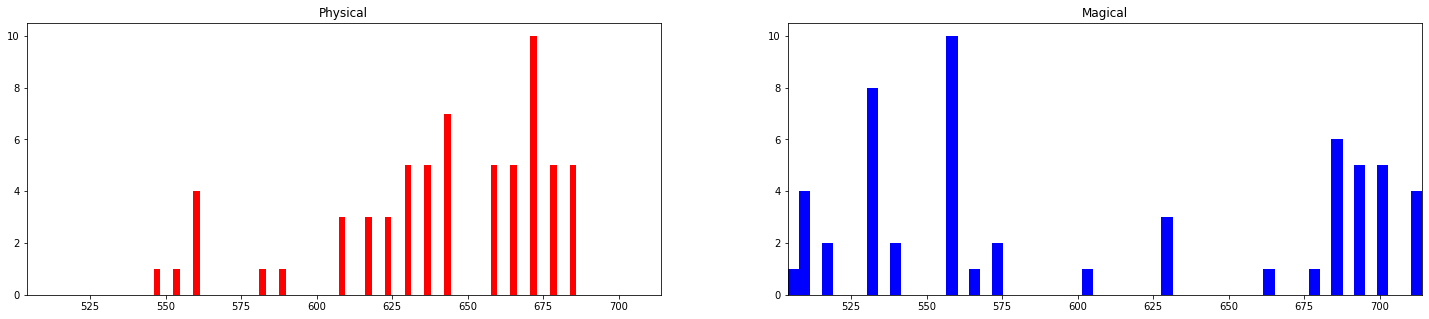

HealthPerLevel


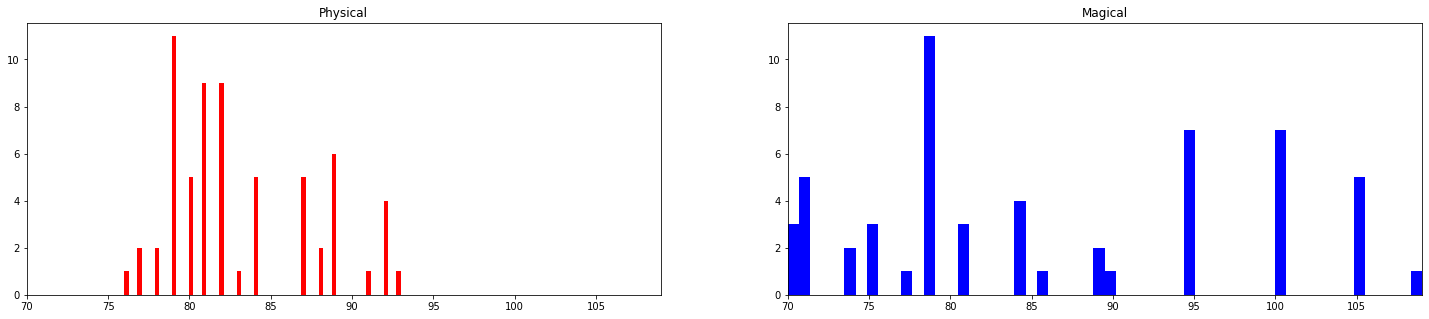

HealthPerFive


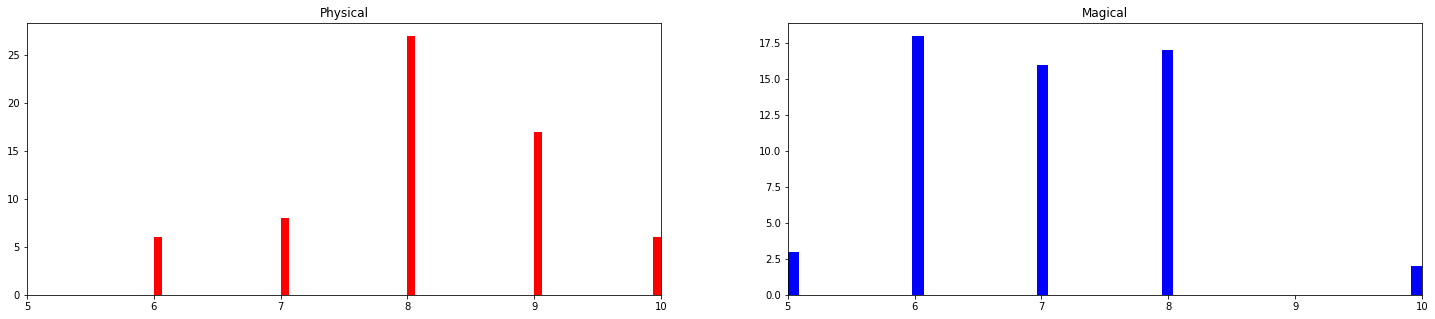

HP5PerLevel


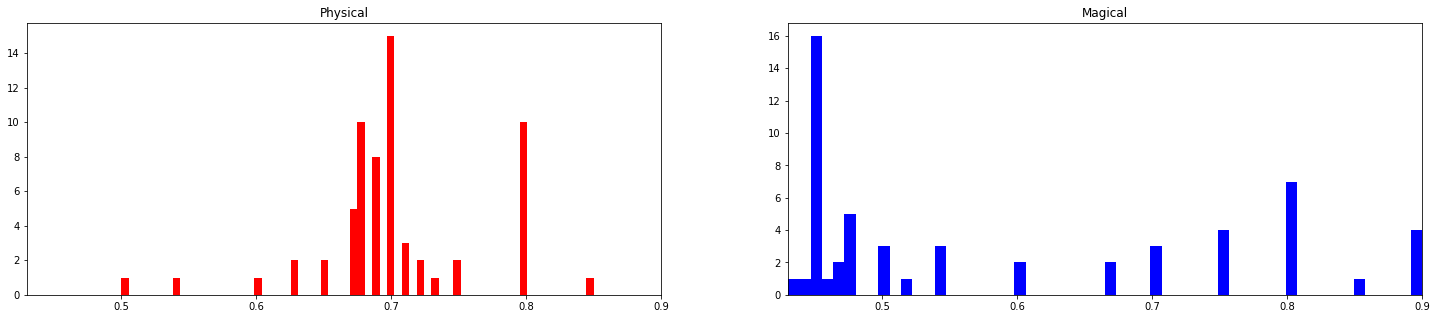

Mana


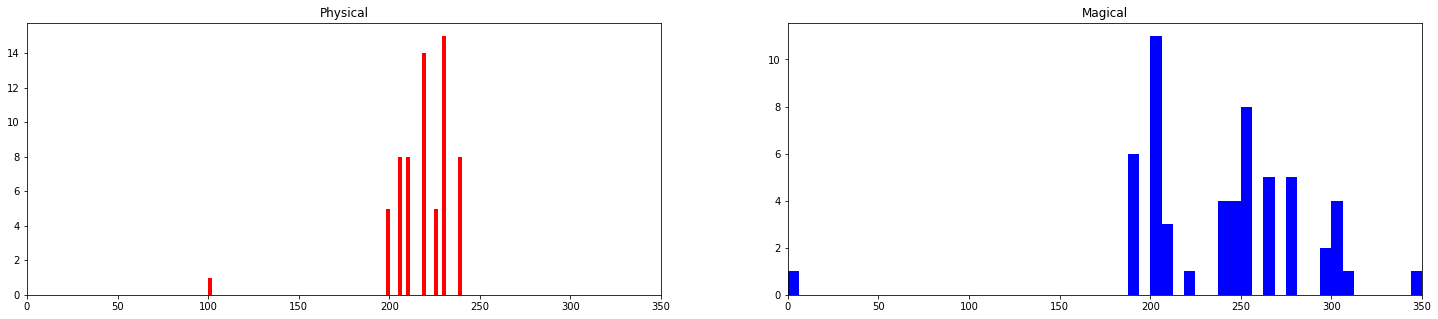

ManaPerLevel


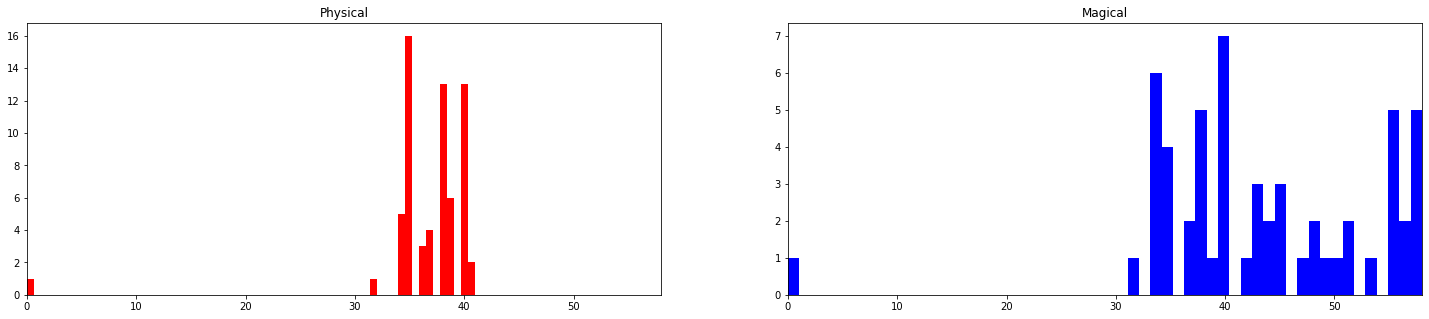

ManaPerFive


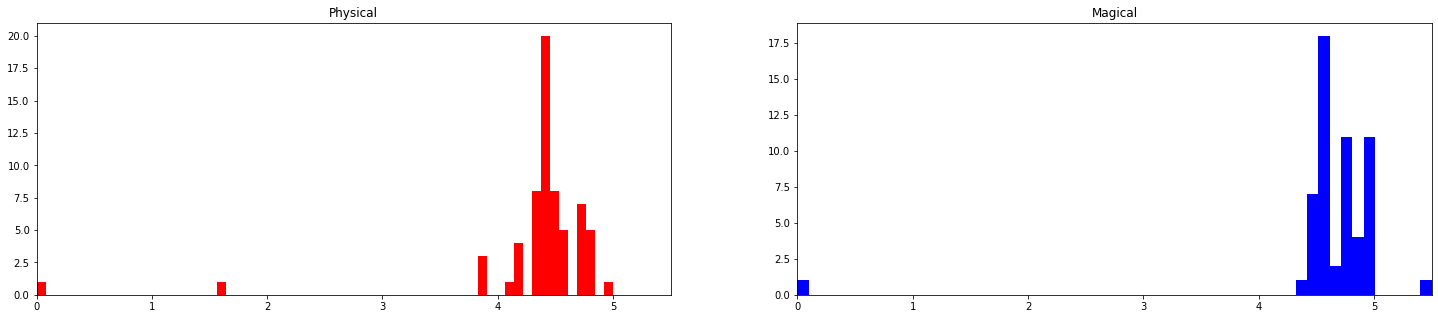

MP5PerLevel


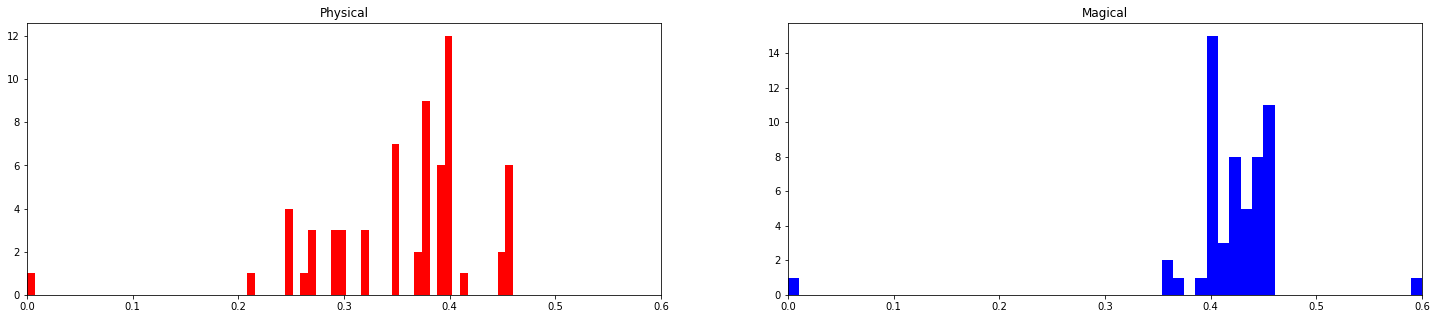

PhysicalProtection


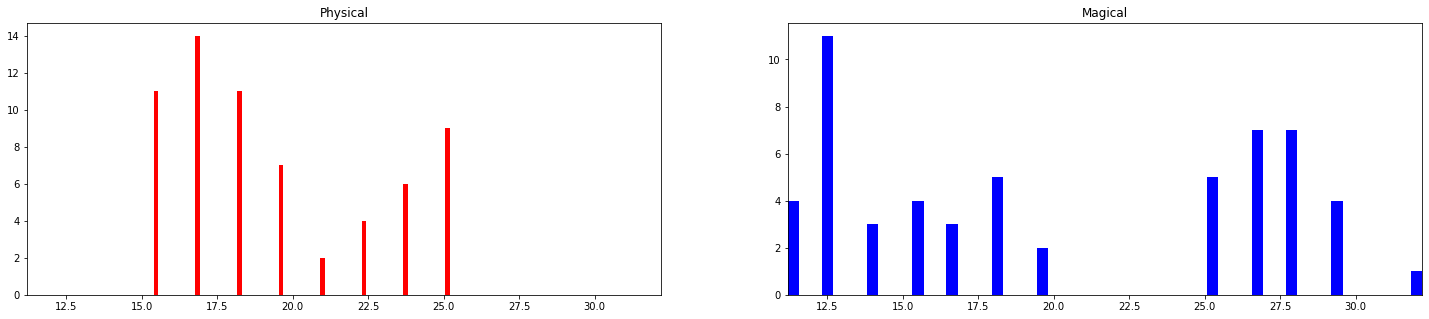

PhysicalProtectionPerLevel


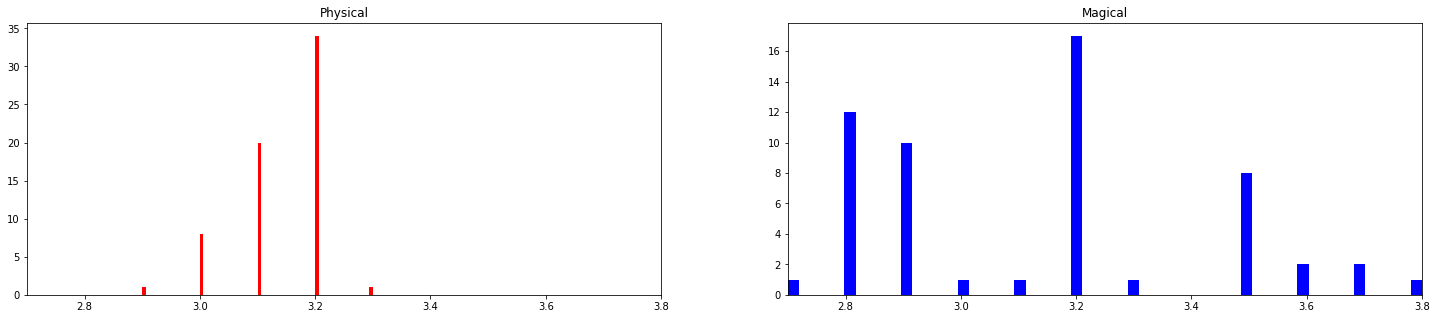

AttackSpeed


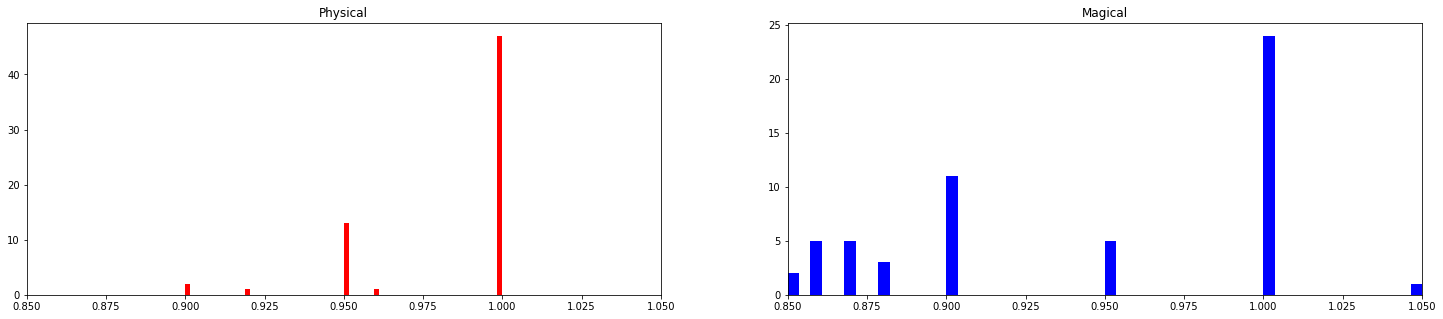

AttackSpeedPerLevel


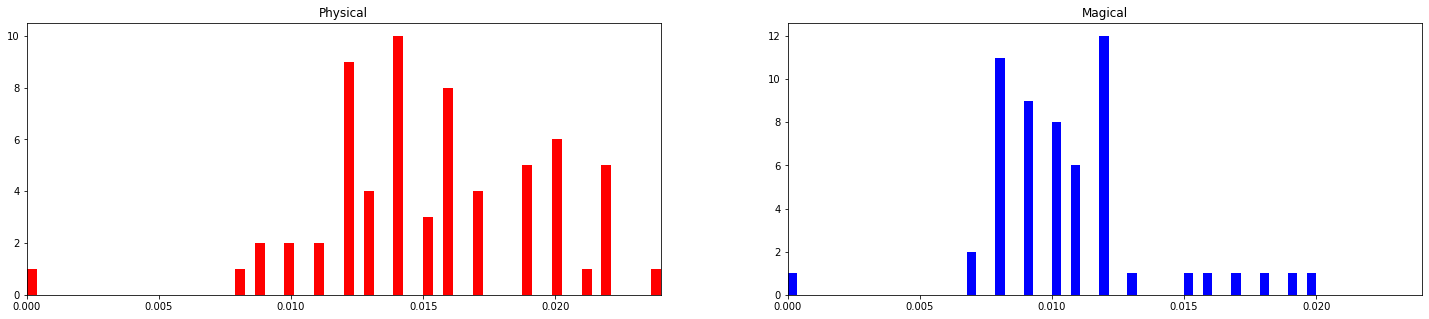

AutoAttackDamage


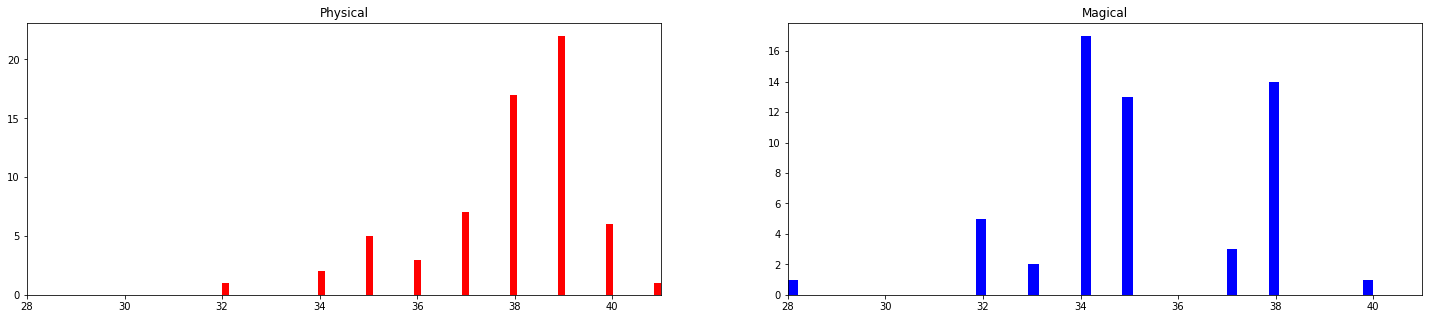

AutoAttackDamagePerLevel


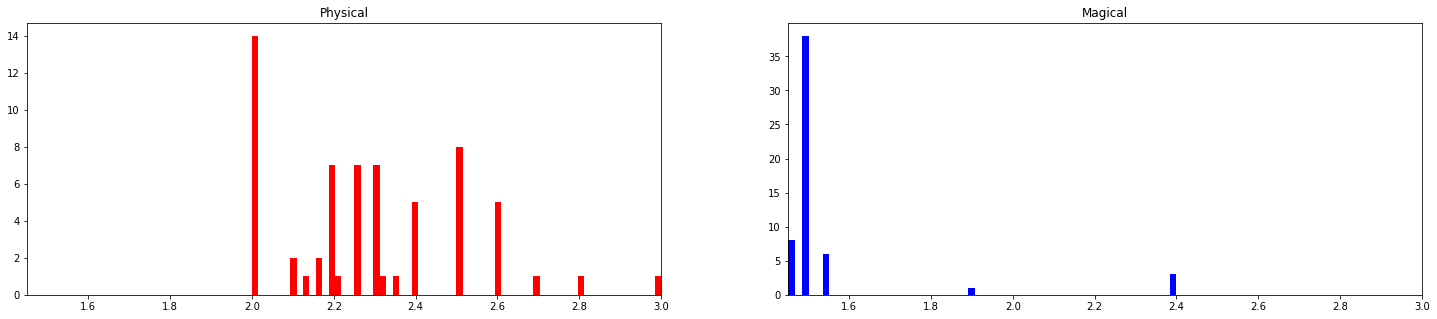

Speed


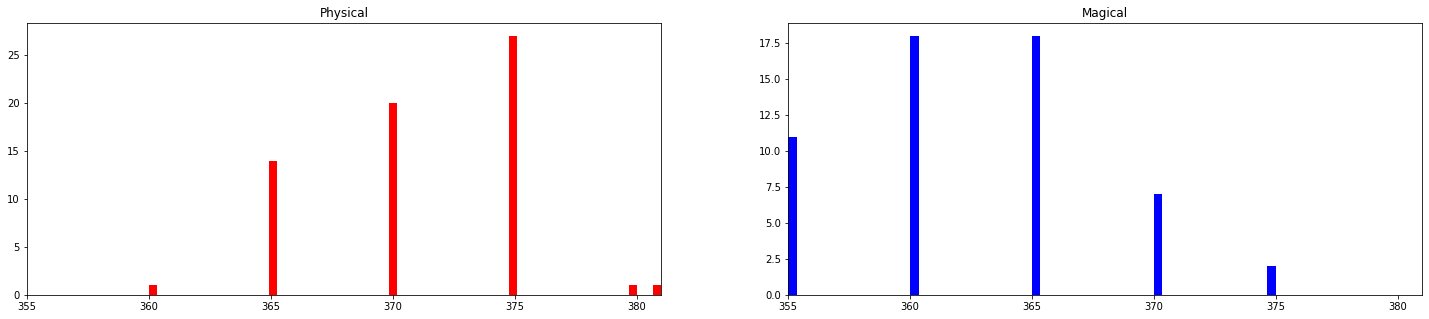

In [25]:
for stat in stats:
    print(stat)
    Plot_stat_Damage_type(stat)

###### For checking the stats based on damage types there isnt as much intersting results as for classes

Looking through the only really noteworthy stat difference are those related to Auto Attacks.

In smite auto attacks are one of two types of damage, the other being ability damage, however the later doesnt rely on the base stats of the gods so it ahs been ommited.

In terms of the analysis we see that there is a clear biased towards pysical based gods having much better auto attacks than there magical counterparts. This can be seen in all four of the stats related to attack speed, most distinctly in Auto attack damage per level.

![alt text](images/AAPL_DT.jpeg "")

Only a few gods are able to match the physical gods (these are the auto attack focused mages in the game, where there are four to speak of)

Health


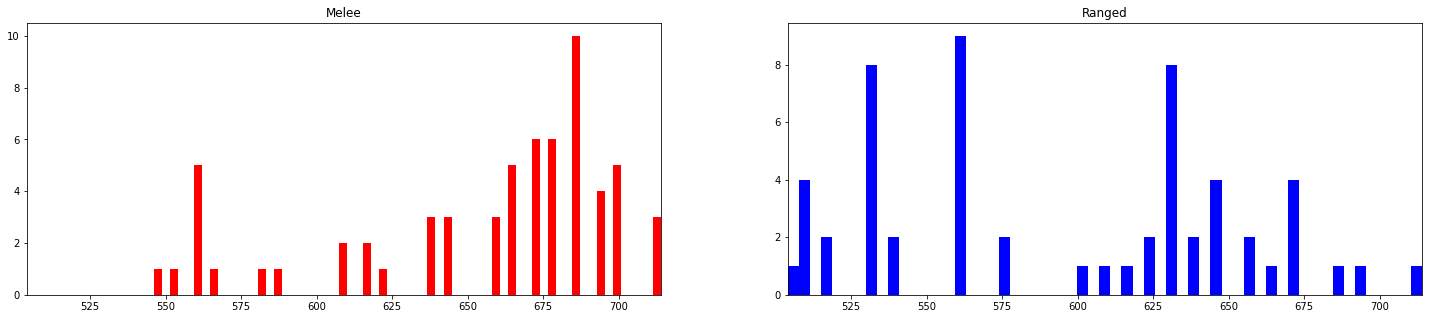

HealthPerLevel


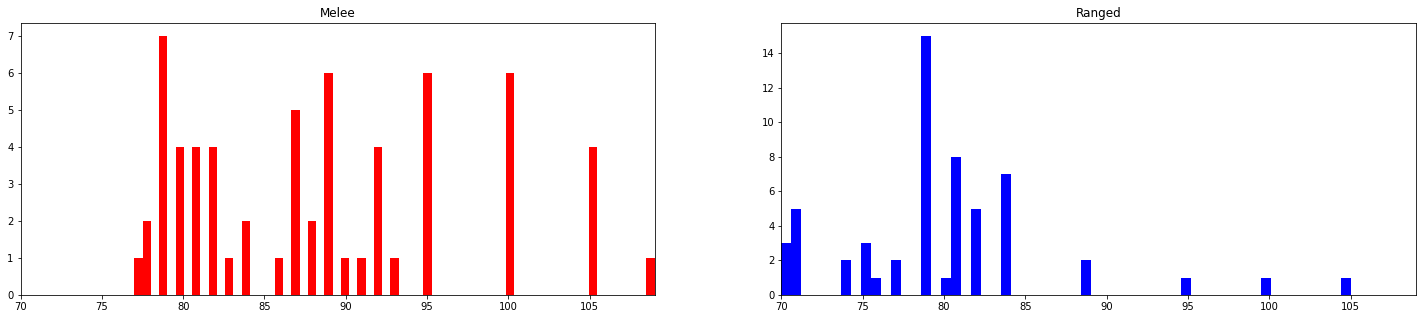

HealthPerFive


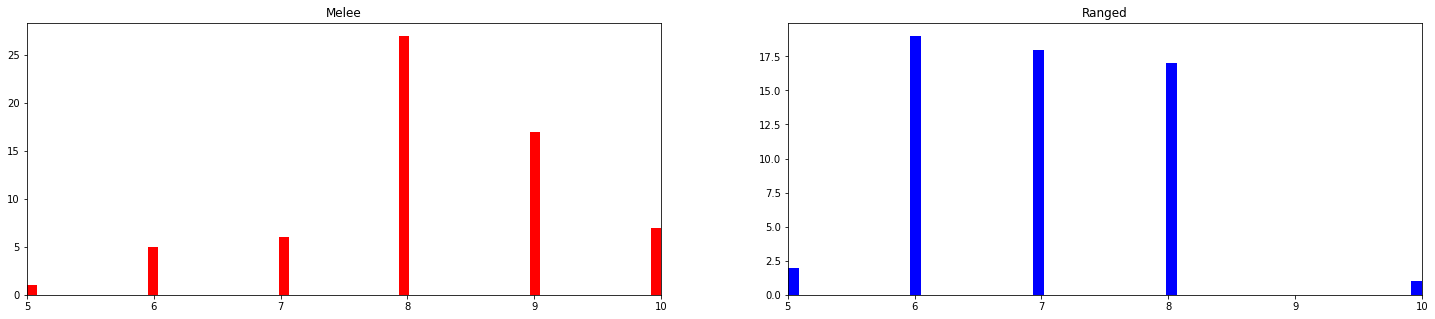

HP5PerLevel


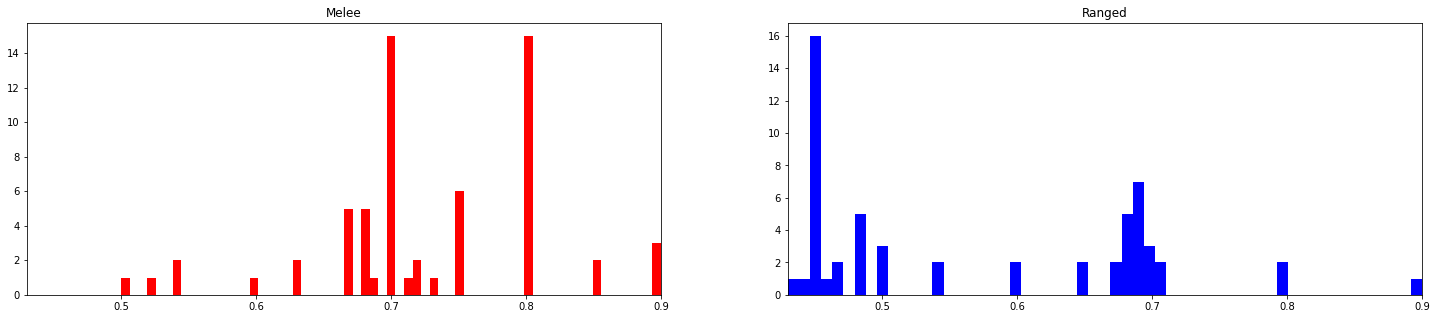

Mana


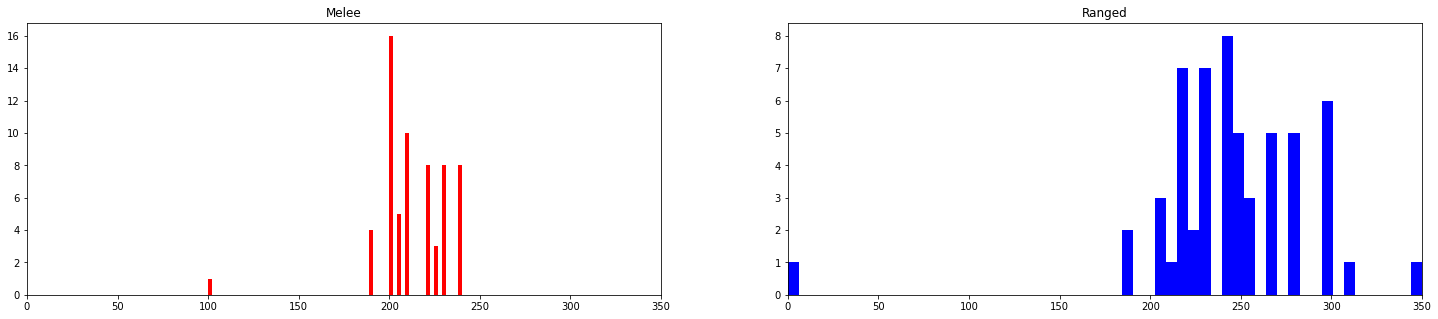

ManaPerLevel


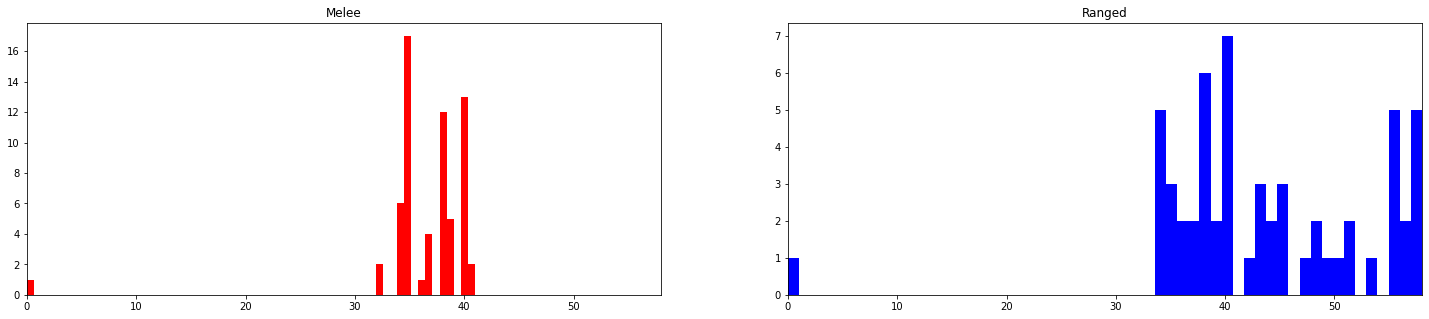

ManaPerFive


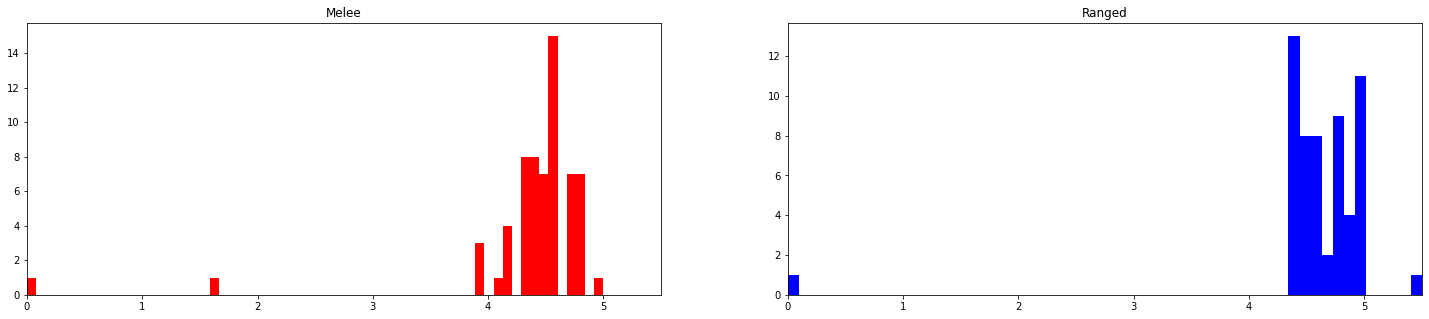

MP5PerLevel


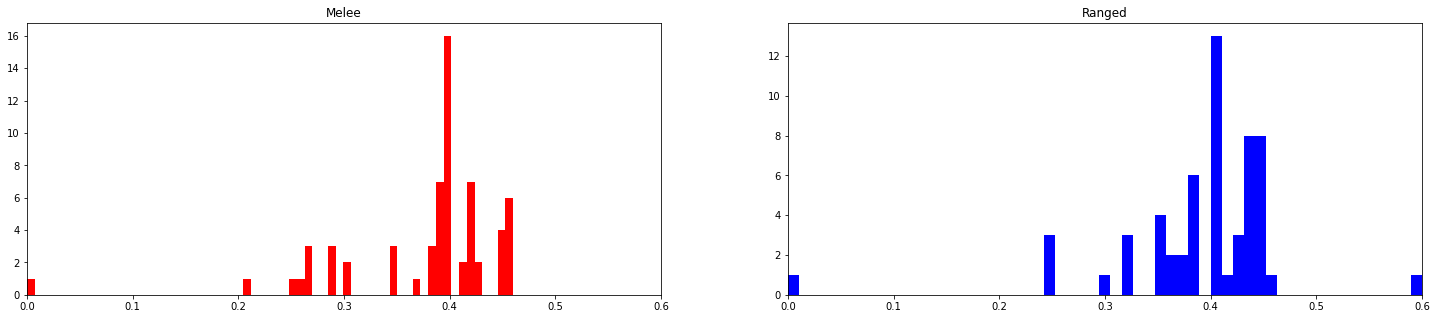

PhysicalProtection


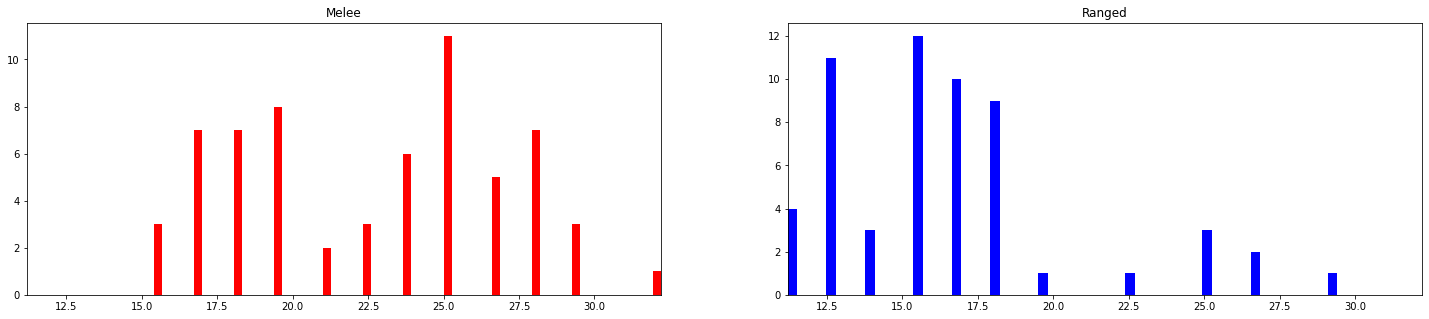

PhysicalProtectionPerLevel


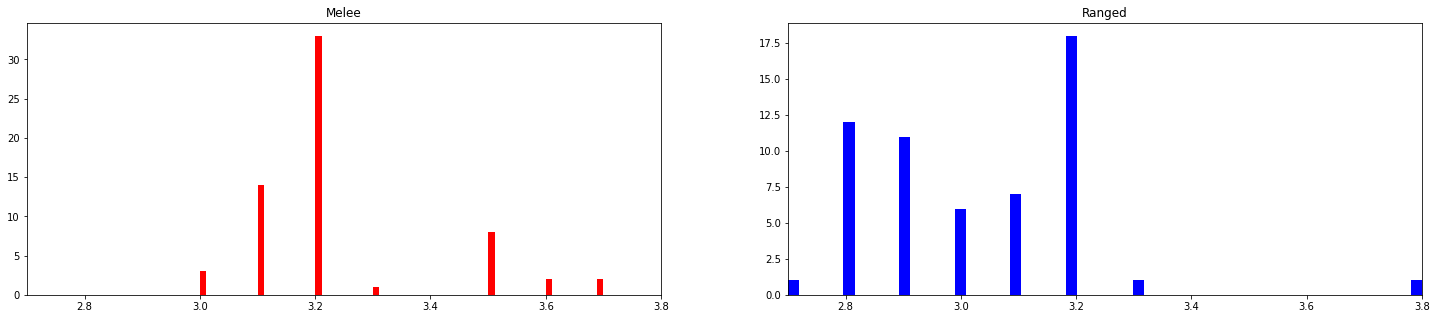

AttackSpeed


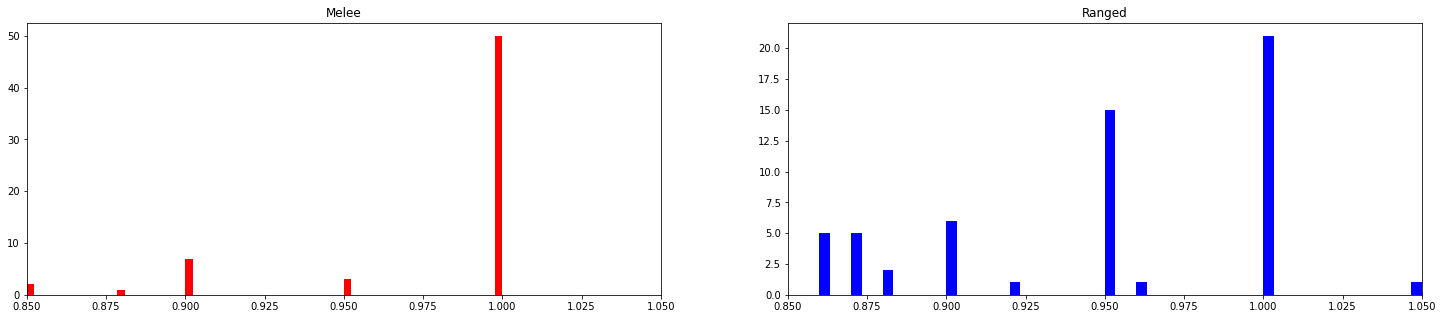

AttackSpeedPerLevel


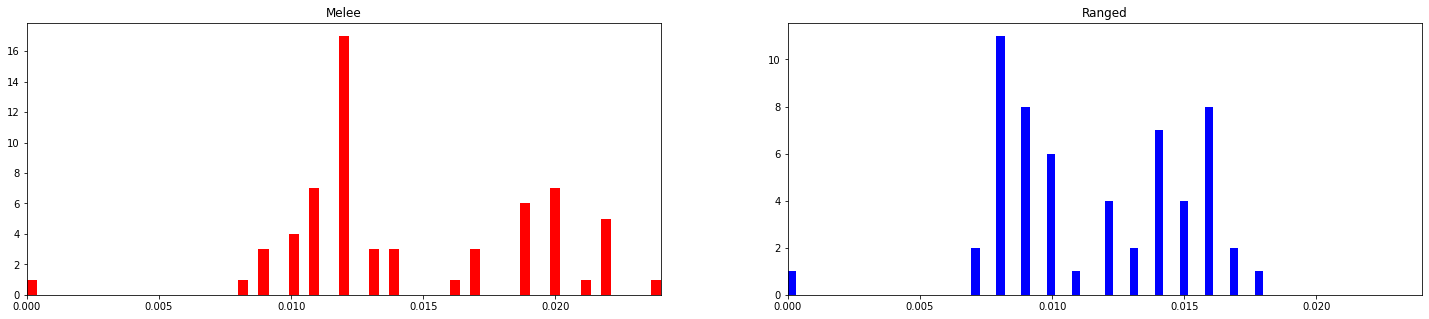

AutoAttackDamage


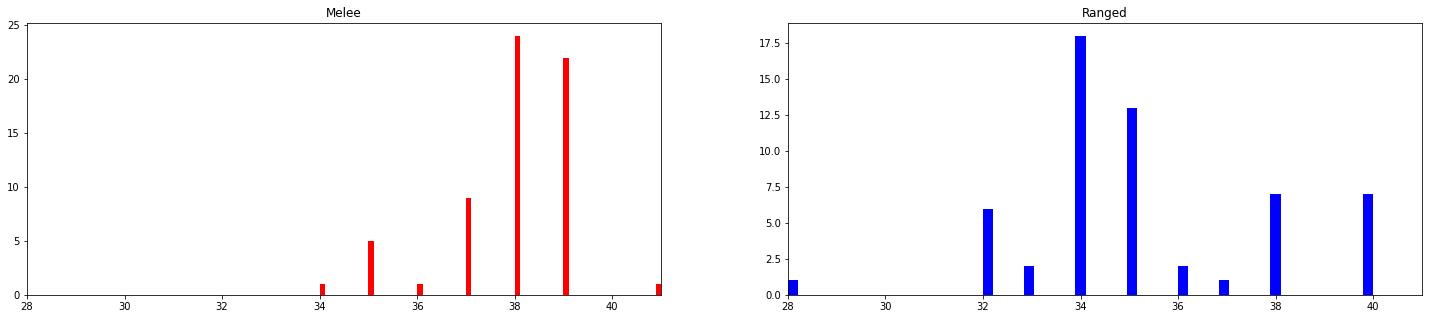

AutoAttackDamagePerLevel


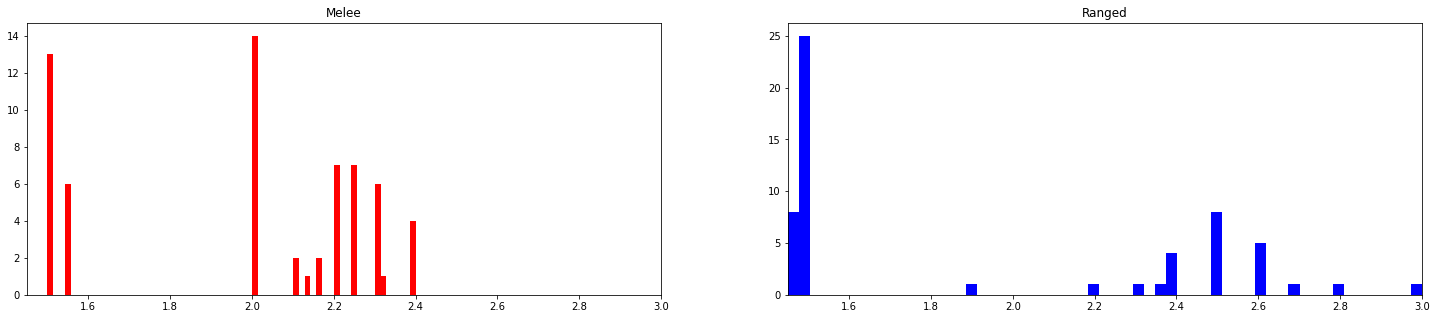

Speed


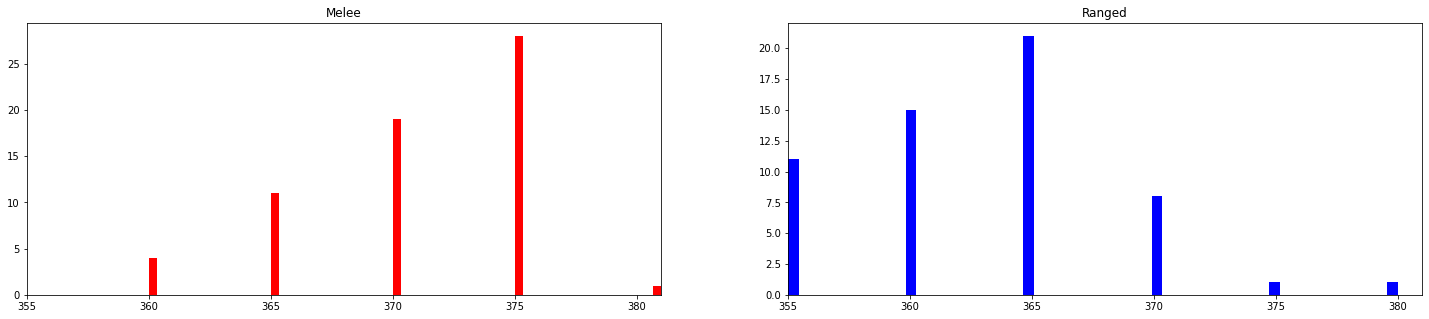

In [26]:
for stat in stats:
    print(stat)
    Plot_stat_Range(stat)

#### Final Thoughts

As you would imagine there are some generalitys in a gods stats based on there class. The other traits though also leading to smilar patterns is most certainly due to the link wiht class. for example wiht some exceptions all ranged gods are mages or hunters and all magical gods are guardians or mages. 

For anyone who is interested in using these stats to gain a competative edge, I would reccomend to get the best information with as little stat memorisation as possible, with it also being worth to remember some of the outliers like the afformentioned nox and baron.

## Can the be grouped?

One question I've had that ML could maybe answer or be at least interesting to see is can the gods be grouped just purely on there base stats into the five classes the game groups them into?

If so how accurate is it and who are the incorrect mismatches? are they gods that used to be a different class for example hades is a mage who used to be a guardian. Or is five classes just to few in terms of base stats maybe there should be six?

Lets find out!

Lets look at the dataset and see what rows we keep in to cluster.

In [27]:
dataset.head()

,Name,Damage_Type,Roles,Range,Pro1,Pro2,Pro3,Health,HealthPerLevel,HealthPerFive,HP5PerLevel,Mana,ManaPerLevel,ManaPerFive,MP5PerLevel,PhysicalProtection,PhysicalProtectionPerLevel,MagicProtection,MagicProtectionPerLevel,AttackSpeed,AttackSpeedPerLevel,AutoAttackDamage,AutoAttackDamagePerLevel,Speed
0,Achilles,Physical,Warrior,"Melee,",High Single Target Damage,High Mobility,None,665,89,9,0.75,205,35,4.7,0.39,23.8,3.2,38.4,1.2,0.95,0.012,38.0,2.0,370
1,Agni,Magical,Mage,"Ranged,",High Area Damage,None,None,504,75,7,0.47,255,45,4.7,0.37,15.4,2.8,38.4,1.2,1.00,0.012,34.0,1.5,355
2,Ah Muzen Cab,Physical,Hunter,"Ranged,",High Movement Speed,High Attack Speed,None,630,77,7,0.71,230,40,4.4,0.38,16.8,3.2,38.4,1.2,0.95,0.016,38.0,2.2,365
3,Ah Puch,Magical,Mage,"Ranged,",High Area Damage,None,None,630,79,6,0.45,265,55,4.9,0.42,18.2,2.9,38.4,1.2,0.86,0.008,35.0,1.5,365
4,Amaterasu,Physical,Warrior,"Melee,",High Area Damage,High Mobility,None,672,89,8,0.80,220,35,4.8,0.40,25.2,3.2,38.4,1.2,1.00,0.014,39.0,2.0,375


so lets see, if we leave in Damage type and Range that will split to close to what the in game classes are so I will not use them or other indicators such as name. I am also choosing to use KMeans so I will ommit the catagorical variables of Pros.

### First standardise the values for K Means

In [58]:
df = (dataset.iloc[:, 7:]-dataset.iloc[:, 7:].mean())/dataset.iloc[:, 7:].std()
X = df.values
X

array([[ 0.65876554,  0.52364618,  1.15631187, ...,  0.57205089,
         0.13629797,  0.45263571],
       [-1.96780251, -1.08334047, -0.48973209, ..., -1.08586905,
        -1.03834977, -1.83575932],
       [ 0.08777249, -0.85377095, -0.48973209, ...,  0.57205089,
         0.60615706, -0.31016263],
       ...,
       [-1.05421362, -0.39463191, -0.48973209, ..., -0.67138907,
        -1.03834977, -1.83575932],
       [-1.51100806, -1.08334047, -1.31275407, ..., -0.67138907,
        -1.03834977, -1.07296098],
       [ 0.08777249,  0.52364618, -1.31275407, ..., -1.50034904,
        -1.03834977, -1.07296098]])

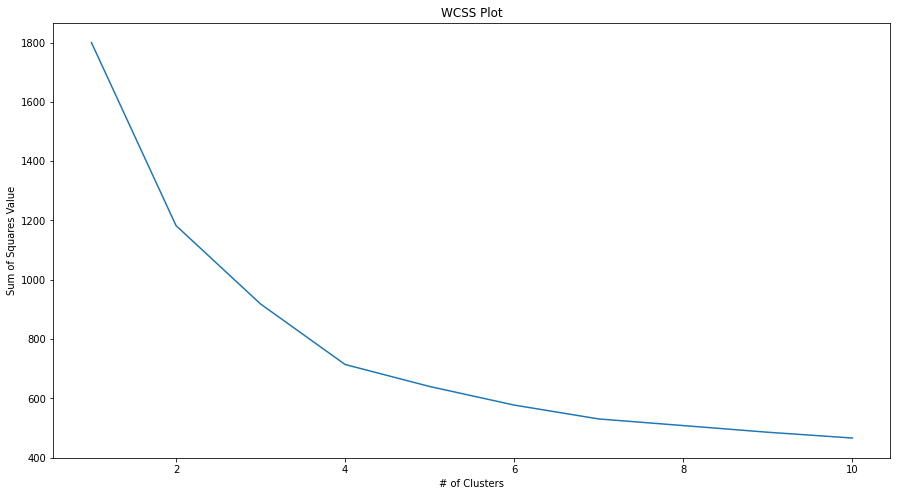

In [59]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++").fit(X)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15, 8))

plt.plot(range(1, 11), wcss)

plt.title("WCSS Plot")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Squares Value")

plt.show()

Looks Like as expected the correct number of clusters is as expected around 4-6 ranging more towards four than any other number. 

As we know there are five classes I will create five clusters

In [60]:
kmeans = KMeans(n_clusters = 5, init = "k-means++").fit(X)
y_clusters = kmeans.predict(X)

In [61]:
for x in range(0, 6):
    display(dataset.iloc[:, 2][y_clusters == x].value_counts())
    print()

Guardian    20
Name: Roles, dtype: int64

Assassin    24
Hunter      21
Mage         3
Name: Roles, dtype: int64

Warrior     1
Guardian    1
Name: Roles, dtype: int64

Mage    33
Name: Roles, dtype: int64

Warrior    18
Name: Roles, dtype: int64

Series([], Name: Roles, dtype: int64)

In [70]:
dataset.iloc[:, [0, 2]][y_clusters == 2]

,Name,Roles
35,Cu Chulainn,Warrior
116,Yemoja,Guardian


Funnily enough the clustering algorithm is quite good at classifying all of the roles with the exception of classifies hunters and assasins together and the "no Mana" class of cu chullain and yemoja who both have no mana stat so may be skewing the results of that cluster as they are rather unique.

Lets try six clusters and see if we can split hunters and assasins.

In [71]:
kmeans = KMeans(n_clusters = 6, init = "k-means++").fit(X)
y_clusters = kmeans.predict(X)

In [87]:
for x in range(0, 6):
    display(dataset.iloc[:, 2][y_clusters == x].value_counts())
    print()

Mage    33
Name: Roles, dtype: int64

Hunter      21
Assassin     3
Mage         1
Name: Roles, dtype: int64

Warrior     1
Guardian    1
Name: Roles, dtype: int64

Guardian    20
Name: Roles, dtype: int64

Assassin    21
Mage         2
Name: Roles, dtype: int64

Warrior    18
Name: Roles, dtype: int64

Changing to six clusters does infact split the gods into there classes with a rather good clarity, there are six gods incorrectly classified. Lets look at them and see if we can see why.

In [76]:
## incorrectly classed as hunter
dataset.iloc[:, [0, 2]][(y_clusters == 1)&(dataset.Roles != 'Hunter')]

,Name,Roles
43,Fenrir,Assassin
105,The Morrigan,Mage
106,Thor,Assassin
109,Tsukuyomi,Assassin


In [77]:
## incorrectly classed as Assasin
dataset.iloc[:, [0, 2]][(y_clusters == 4)&(dataset.Roles != 'Assassin')]

,Name,Roles
7,Ao Kuang,Mage
44,Freya,Mage


Its a little hard to identify why some are being misclassified as hunters knowing who they are so lets plot the cluster stats and see if it will make more sense then.

In [85]:
def Plot_stat_Cluster(k):
    fig, ax = plt.subplots(1, 6, figsize=(25,5)) 

    min_ = dataset[k].min()
    max_ = dataset[k].max()

    A = dataset[k][y_clusters == 5].values
    B = dataset[k][y_clusters == 4].values
    C = dataset[k][y_clusters == 0].values
    D = dataset[k][y_clusters == 3].values
    E = dataset[k][y_clusters == 1].values
    F = dataset[k][y_clusters == 2].values
    
    data = [A, B, C, D, E, F]
    labels = ['Warrior', 'Assasin', 'Mage', 'Guardian' , 'Hunter', 'No Mana']
    color = ['Red', 'Yellow', 'Blue', 'Green', 'Orange', 'Black']

    for i, x in enumerate(data):
        ax[i].set_xlim(min_, max_)
        ax[i].set_title(labels[i])
        ax[i].hist(x, len(x), color = color[i])
        
    plt.show()

Health


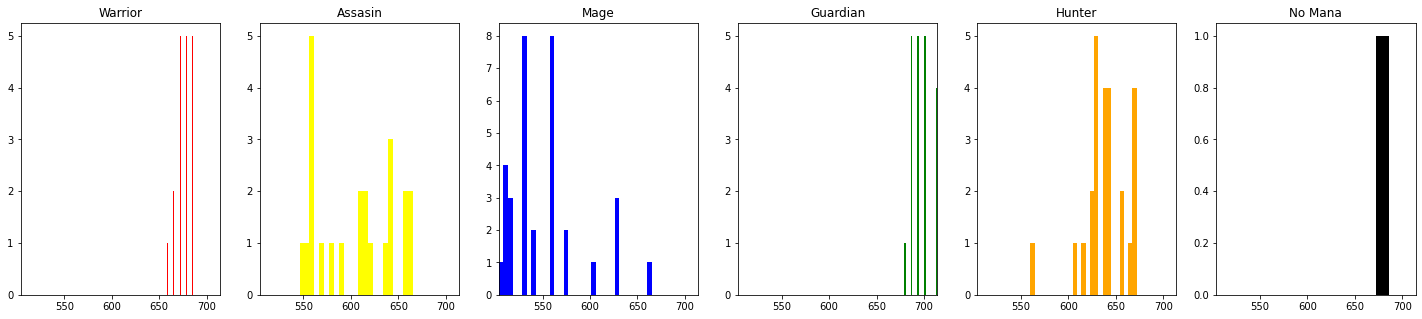

HealthPerLevel


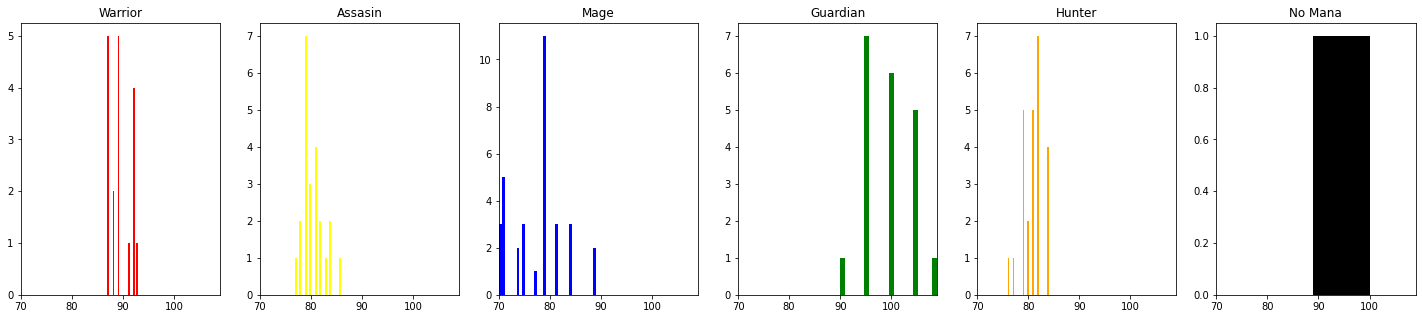

HealthPerFive


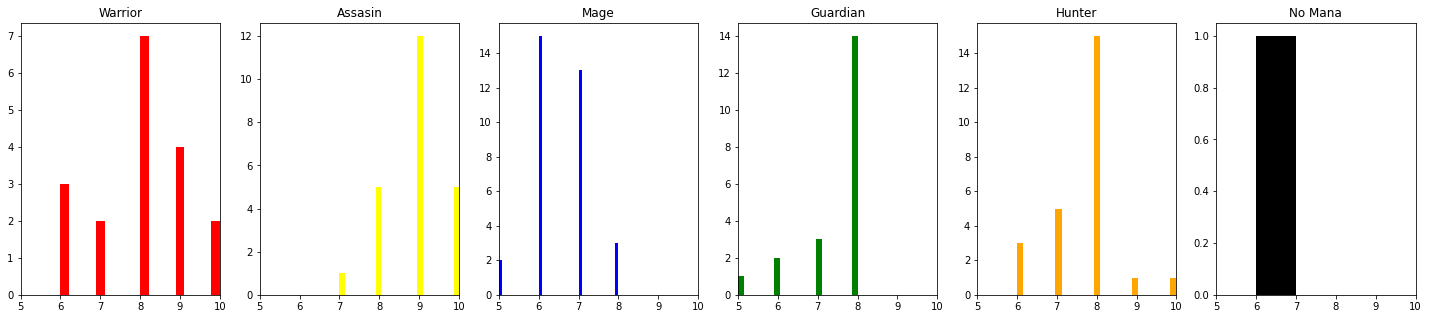

HP5PerLevel


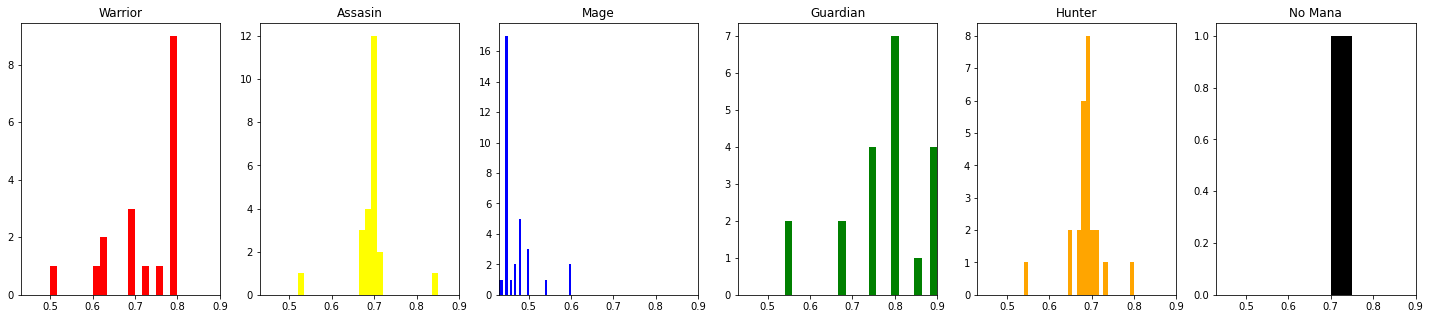

Mana


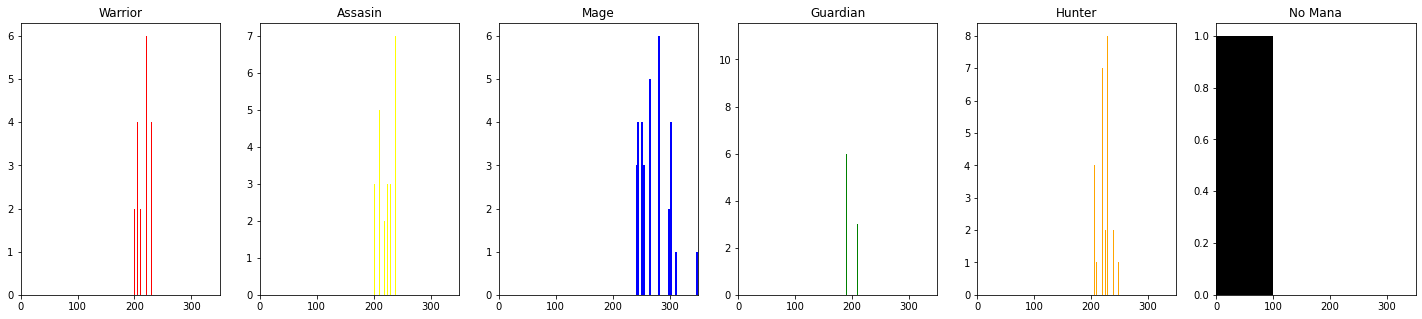

ManaPerLevel


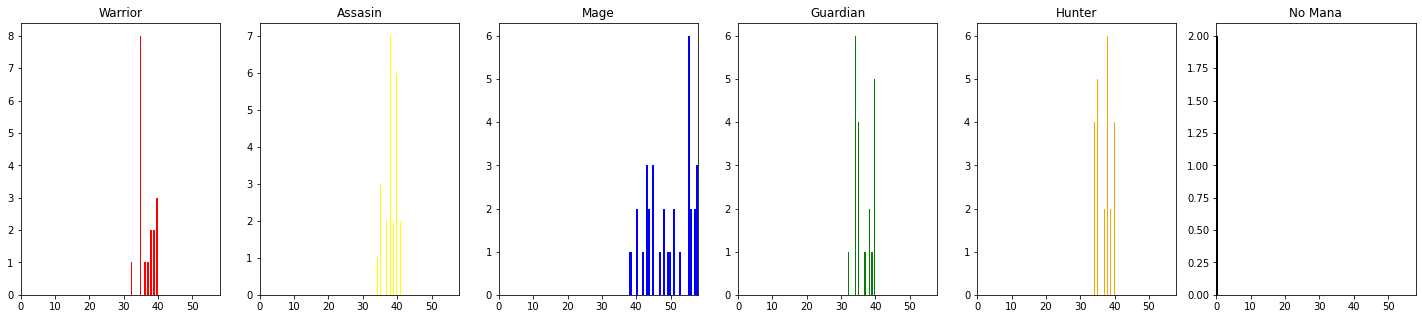

ManaPerFive


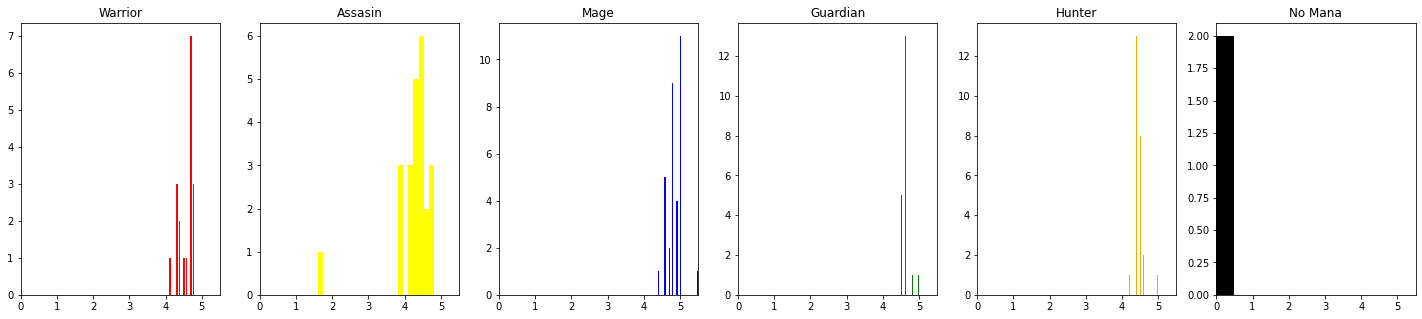

MP5PerLevel


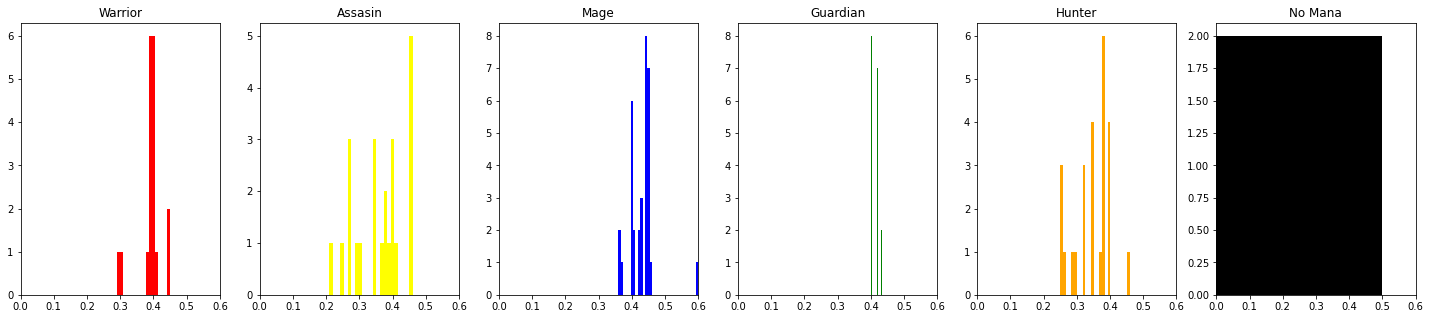

PhysicalProtection


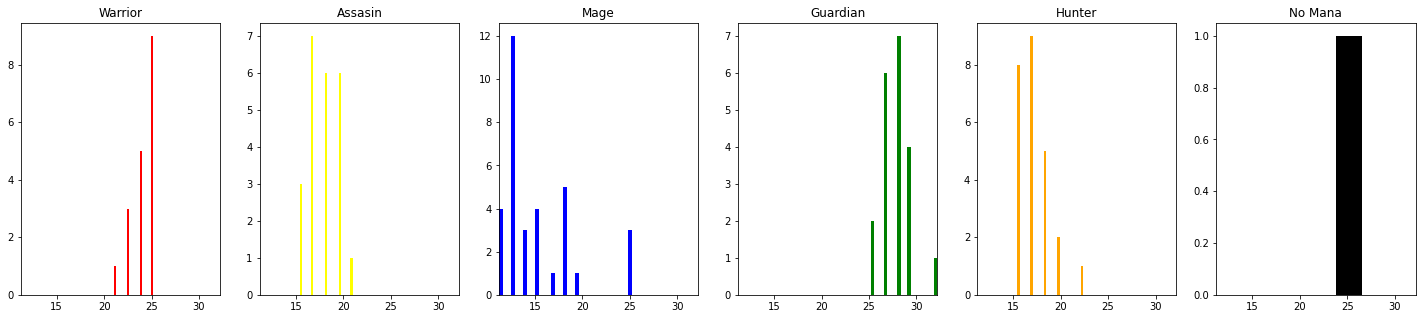

PhysicalProtectionPerLevel


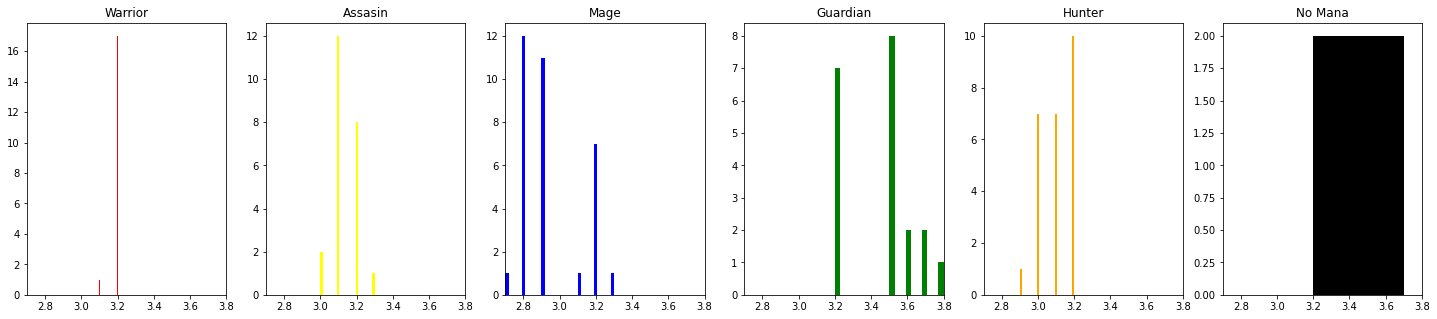

AttackSpeed


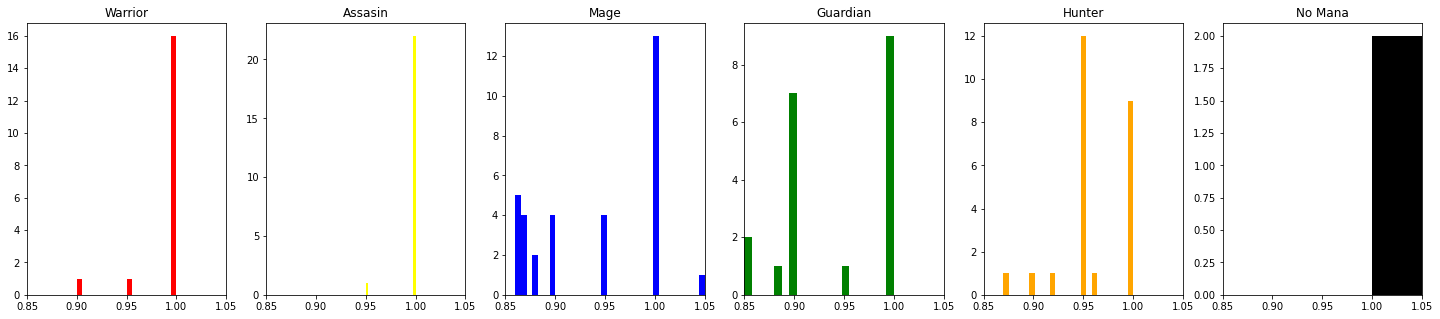

AttackSpeedPerLevel


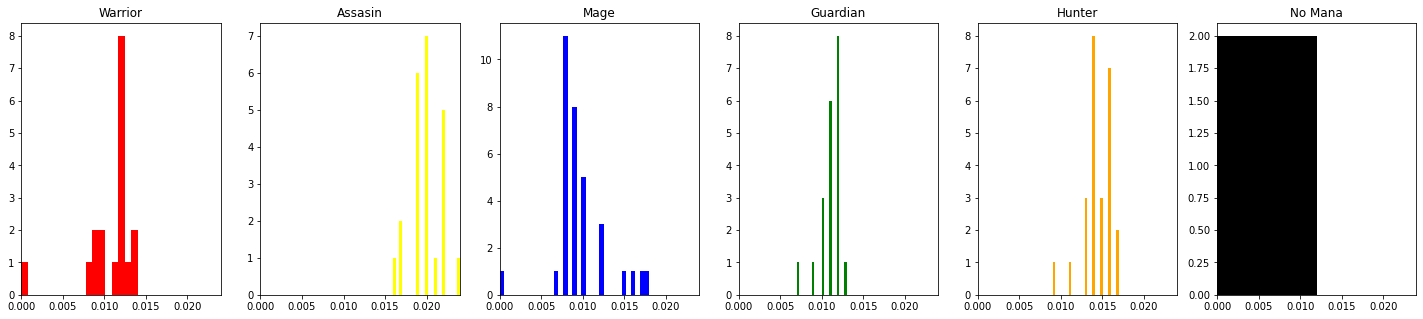

AutoAttackDamage


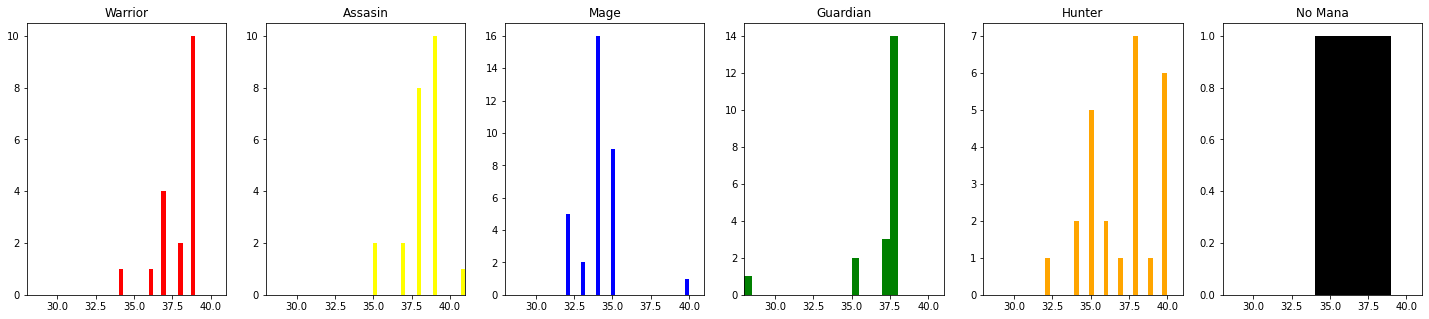

AutoAttackDamagePerLevel


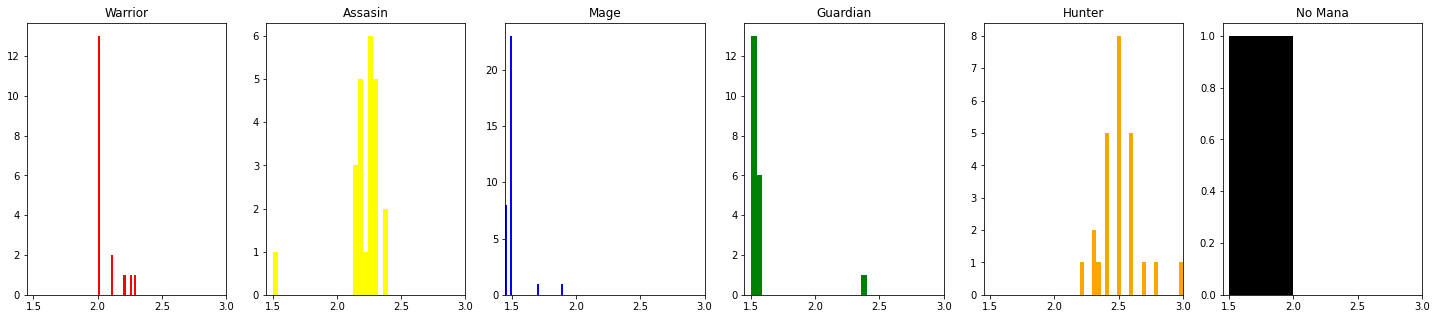

Speed


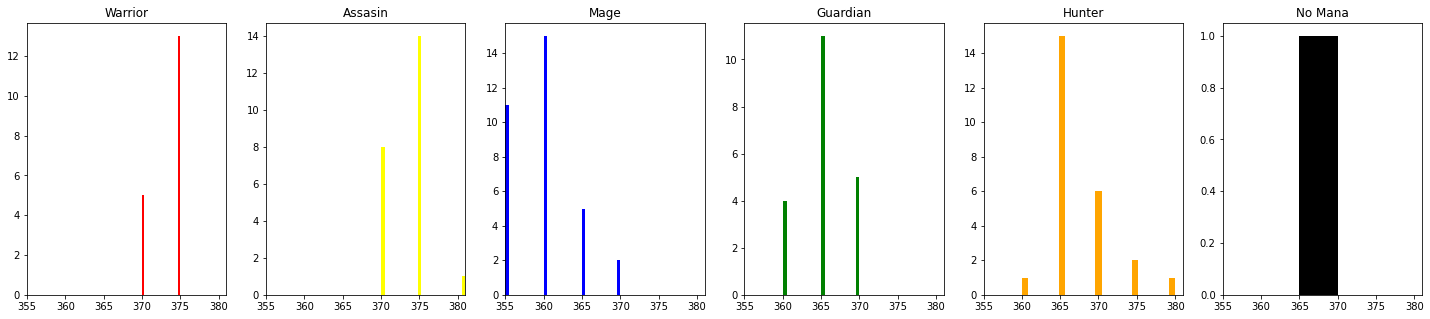

In [86]:
for stat in stats:
    print(stat)
    Plot_stat_Cluster(stat)

### Conclusions?

Looking at the stats it does seem that as hunters and assasins are very close in stats together that a few mis-classified.

Also worth noting that the mis-classifed assasin au Kuang is mage, however is referrred to as a magical assasin so its nice to see him lumped in with assasins.

So to answer the question can you clsuter the gods into there roles? Yes. Does this mean that we dont need more classes, I would say yes unless we were to add a few new gods there base stats alone does not warrent a new class. That being said if we look at there abilities, which is a lot harder to quantatativly analyze we may need ones.